We will create 3 different models:
- PD (Probability of Default) - showing a customer not repaying their debt in full or on time.
- LGD (Loss Given Default) - showing the proportion of an exposure a company loses when a customer defaults.
The proportion of the total exposure that cannot be recovered by the lender once a default has occured.
- EAD (Expoosure at Default) - showing the total loss in terms of amount of money the bank is exposed to if a customer defaults.

EL (expected loss) = PD * LGD * EAD

Estimating expected loss (expected credit loss)
Definition: The amount a lender might lose by lending to a borrower

Capital requirement -- Capital adequacy ratio (CAR):
Capital / Risk-weighted assets (Loans) >= 8%

Basel II Accord:
- Minimum Capital Requirement: How much capital banks need to have
    - Credit risk
    - Operational risk
    - Market risk
- Supervisory Review: How capital is defined
- Market Discipline: How capital is compared against risk-weighted assets

The greater the risk a bank is exposed to, the greater the amount of capital it needs to hold

Basel II Accord prescribes that regulators should allow banks to choose from 3 different approaches for calculating or modeling credit risk (calculating or modeling each of the 3 components of the expected loss):
- standardized approach (SA)
- internal ratings based (IRB) approaches
    - foundation internal ratings based (F-IRB) approach
    - advanced internal ratings based (A-IRB) approach

In this project, we are going to focus on the general case:
Enough data are available for implementing a traditional statistical methodology to build credit risk models.

Loan to value ratio (LTV) : The proportion of the property that is funded by the loan

Return on assets (ROA) = Net income / Total assets
Return on equity (ROE) = Net income / Shareholders' equity
Current ratio = Current assets / Current liabilities
Debt ratio = Total liabilities / Total assets

Application model : is used to estimate a firm's credit rating at the moment of application
The estimated credit ratings are the basis oon which banks decide whether to grant a loan or not, a bank may also use the estimated credit ratings to decide how to price the loan.

Behavioral model: is used to calculate probability of default and respectively expected loss after a loan is granted, banks may also use behavioral models to decide whether to grant an additional loan to an existing customer.


Our goal is to learn how to build statistical models for estimating EL.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np

Data source: https://www.dropbox.com/scl/fi/rzqaawjqwt4qe3rmnnxiw/loan_data_2007_2014.csv?rlkey=a5y6ojznit1ozu8fwt0m7w11w&e=1&dl=0

## Import Data

In [3]:
# Import Data
loan_data_backup = pd.read_csv('/Users/mang/Desktop/applied machine learning/individual assignment/Credit-Risk-Modeling-in-Python/loan_data_2007_2014.csv')
loan_data_backup.head()

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_2621/453420008.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('/Users/mang/Desktop/applied machine learning/individual assignment/Credit-Risk-Modeling-in-Python/loan_data_2007_2014.csv')


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [4]:
loan_data = loan_data_backup.copy()

## Explore Data

In [5]:
pd.options.display.max_columns = None

In [6]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year', '')

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_2621/685063253.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [10]:
type(loan_data['emp_length_int'][0])

str

In [11]:
# transform to numeric
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [12]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [13]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [14]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [15]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [17]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [18]:
# check 'mths_since_earliest_cr_line' column vlaues which less than 0 (year should be 19xx not 206x)
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [19]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_2621/2332624952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [20]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [21]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [22]:
loan_data['term_int'] = loan_data['term'].str.replace('months', '')

In [23]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [24]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [25]:
loan_data['mths_since_issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [26]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-1') - loan_data['mths_since_issue_d']) / np.timedelta64(1, 'M')))

In [27]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [29]:
pd.get_dummies(loan_data['grade'])

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [30]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [31]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [32]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [33]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [34]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values and clean

In [35]:
loan_data.isnull()

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0       False     False        False  False      False       True       False   
1       False     False        False  False      False      False       False   
2       False     False        False  False      False       True       False   
3       False     False        False  False      False      False       False   
4       False     False        False  False      False      False       False   
...       ...       ...          ...    ...        ...        ...         ...   
466280  False     False        False  False      False      False       False   
466281  False     False        False  False      False      False       False   
466282  False     False        False  False      False      False       False   
466283  False     False        False  False      False      False       False   
466284  False     False        False  False      False       True       False   

        home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0                False       False                False    False        False   
1                False       False                False    False        False   
2                False       False                False    False        False   
3                False       False                False    False        False   
4                False       False                False    False        False   
...                ...         ...                  ...      ...          ...   
466280           False       False                False    False        False   
466281           False       False                False    False        False   
466282           False       False                False    False        False   
466283           False       False                False    False        False   
466284           False       False                False    False        False   

        pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0            False  False  False    False  False     False       False  False   
1            False  False  False    False  False     False       False  False   
2            False  False   True    False  False     False       False  False   
3            False  False  False    False  False     False       False  False   
4            False  False  False    False  False     False       False  False   
...            ...    ...    ...      ...    ...       ...         ...    ...   
466280       False  False   True    False  False     False       False  False   
466281       False  False   True    False  False     False       False  False   
466282       False  False  False    False  False     False       False  False   
466283       False  False   True    False  False     False       False  False   
466284       False  False  False    False  False     False       False  False   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0             False             Fal

In [36]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [37]:
pd.options.display.max_rows = 100

In [38]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [39]:
loan_data['annual_inc'].fillna((loan_data['annual_inc']).mean(), inplace = True)

In [40]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

# PD model

## Data Preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [41]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [42]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [43]:
# good 0, bad 1
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (16-30 days)']), 0, 1)

In [44]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

Fine-classing: turning continuous variables into categories, splitting a variable into roughly equal categories according to an internal criteria, such as the values of the variable or the number of cases in each category.

Weight of evidence: shows to what extent an independent variable would predict a dependent variable.

Coarse classing: the process of constructing new categories based on the initial ones, splitting a variable into categories according to an external criteria that show how much the categories explain another variable, such as weight of evidence.

Information value: how much information the original independent variable brings with respect to explaining the dependent variable brings with respect to explaining the dependent variable, is calculated from weight of evidence and the difference of the proportions of two outcomes accross all categories of an original independent variable.

Overfitting: Our statistical model has focused on a particular dataset so much that it has missed the point
Underfitting: The model fails to capture the underlying logic of the data

##### Splitting Data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 253177      253177  34593212   37276508      14000        14000   
 15455        15455    741468     939356       7350         7350   
 37554        37554    378475     403744       6150         6150   
 45850        45850   9584917   11437044      20000        20000   
 376736      376736  17715691   19848160      15000        15000   
 ...            ...       ...        ...        ...          ...   
 276528      276528  29775355   32328588      21600        21600   
 375768      375768  17924475   20076981       5500         5500   
 228546      228546   1101503    1338259       5000         5000   
 154367      154367   3847210    4860740      10000        10000   
 97774        97774   6907291    8549292       9500         9500   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 253177         14000.00   60 months     17.86       354.45     D        D5   
 15455           7325.00

In [47]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state=42)

## Data Preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [48]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [49]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [50]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head()

grade  good_bad
427211     A         1
206088     C         1
136020     A         1
412305     D         1
36159      C         0

In [51]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     59759
1     B    109730
2     C    100245
3     D     61498
4     E     28612
5     F     10530
6     G      2654

In [52]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.964775
1     B  0.929199
2     C  0.899426
3     D  0.864272
4     E  0.826821
5     F  0.776923
6     G  0.754333

In [53]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()],
                axis=1)
df1

grade  good_bad grade  good_bad
0     A     59759     A  0.964775
1     B    109730     B  0.929199
2     C    100245     C  0.899426
3     D     61498     D  0.864272
4     E     28612     E  0.826821
5     F     10530     F  0.776923
6     G      2654     G  0.754333

In [54]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

grade  good_bad  good_bad
0     A     59759  0.964775
1     B    109730  0.929199
2     C    100245  0.899426
3     D     61498  0.864272
4     E     28612  0.826821
5     F     10530  0.776923
6     G      2654  0.754333

In [55]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade   n_obs  prop_good
0     A   59759   0.964775
1     B  109730   0.929199
2     C  100245   0.899426
3     D   61498   0.864272
4     E   28612   0.826821
5     F   10530   0.776923
6     G    2654   0.754333

In [56]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

grade   n_obs  prop_good  prop_n_obs
0     A   59759   0.964775    0.160200
1     B  109730   0.929199    0.294160
2     C  100245   0.899426    0.268733
3     D   61498   0.864272    0.164862
4     E   28612   0.826821    0.076702
5     F   10530   0.776923    0.028228
6     G    2654   0.754333    0.007115

In [57]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad
0     A   59759   0.964775    0.160200   57654.0   2105.0
1     B  109730   0.929199    0.294160  101961.0   7769.0
2     C  100245   0.899426    0.268733   90163.0  10082.0
3     D   61498   0.864272    0.164862   53151.0   8347.0
4     E   28612   0.826821    0.076702   23657.0   4955.0
5     F   10530   0.776923    0.028228    8181.0   2349.0
6     G    2654   0.754333    0.007115    2002.0    652.0

In [58]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     A   59759   0.964775    0.160200   57654.0   2105.0     0.171197   
1     B  109730   0.929199    0.294160  101961.0   7769.0     0.302762   
2     C  100245   0.899426    0.268733   90163.0  10082.0     0.267730   
3     D   61498   0.864272    0.164862   53151.0   8347.0     0.157826   
4     E   28612   0.826821    0.076702   23657.0   4955.0     0.070247   
5     F   10530   0.776923    0.028228    8181.0   2349.0     0.024293   
6     G    2654   0.754333    0.007115    2002.0    652.0     0.005945   

   prop_n_bad  
0    0.058055  
1    0.214264  
2    0.278055  
3    0.230205  
4    0.136656  
5    0.064784  
6    0.017982

In [59]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     A   59759   0.964775    0.160200   57654.0   2105.0     0.171197   
1     B  109730   0.929199    0.294160  101961.0   7769.0     0.302762   
2     C  100245   0.899426    0.268733   90163.0  10082.0     0.267730   
3     D   61498   0.864272    0.164862   53151.0   8347.0     0.157826   
4     E   28612   0.826821    0.076702   23657.0   4955.0     0.070247   
5     F   10530   0.776923    0.028228    8181.0   2349.0     0.024293   
6     G    2654   0.754333    0.007115    2002.0    652.0     0.005945   

   prop_n_bad       WoE  
0    0.058055  1.081435  
1    0.214264  0.345739  
2    0.278055 -0.037842  
3    0.230205 -0.377475  
4    0.136656 -0.665448  
5    0.064784 -0.980885  
6    0.017982 -1.106852

In [60]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.754333    0.007115    2002.0    652.0     0.005945   
1     F   10530   0.776923    0.028228    8181.0   2349.0     0.024293   
2     E   28612   0.826821    0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272    0.164862   53151.0   8347.0     0.157826   
4     C  100245   0.899426    0.268733   90163.0  10082.0     0.267730   
5     B  109730   0.929199    0.294160  101961.0   7769.0     0.302762   
6     A   59759   0.964775    0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  
0    0.017982 -1.106852  
1    0.064784 -0.980885  
2    0.136656 -0.665448  
3    0.230205 -0.377475  
4    0.278055 -0.037842  
5    0.214264  0.345739  
6    0.058055  1.081435

In [61]:
# calculate the differences in the proportion of good loans between two subsequent categories and the difference of weight of evidence between two subsequent categories.
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.754333    0.007115    2002.0    652.0     0.005945   
1     F   10530   0.776923    0.028228    8181.0   2349.0     0.024293   
2     E   28612   0.826821    0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272    0.164862   53151.0   8347.0     0.157826   
4     C  100245   0.899426    0.268733   90163.0  10082.0     0.267730   
5     B  109730   0.929199    0.294160  101961.0   7769.0     0.302762   
6     A   59759   0.964775    0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.017982 -1.106852             NaN       NaN  
1    0.064784 -0.980885        0.022590  0.125967  
2    0.136656 -0.665448        0.049898  0.315437  
3    0.230205 -0.377475        0.037451  0.287973  
4    0.278055 -0.037842        0.035154  0.339633  
5    0.214264  0.345739        0.029773  0.383581  
6    0.058055  1.081435        0.035576  0.735695

In [62]:
# information value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.754333    0.007115    2002.0    652.0     0.005945   
1     F   10530   0.776923    0.028228    8181.0   2349.0     0.024293   
2     E   28612   0.826821    0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272    0.164862   53151.0   8347.0     0.157826   
4     C  100245   0.899426    0.268733   90163.0  10082.0     0.267730   
5     B  109730   0.929199    0.294160  101961.0   7769.0     0.302762   
6     A   59759   0.964775    0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017982 -1.106852             NaN       NaN  0.277898  
1    0.064784 -0.980885        0.022590  0.125967  0.277898  
2    0.136656 -0.665448        0.049898  0.315437  0.277898  
3    0.230205 -0.377475        0.037451  0.287973  0.277898  
4    0.278055 -0.037842        0.035154  0.339633  0.277898  
5    0.214264  0.345739        0.029773  0.383581  0.277898  
6    0.058055  1.081435        0.035576  0.735695  0.277898

### Preprocessing discrete variables: automating calculations

In [63]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    

In [64]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.754333    0.007115    2002.0    652.0     0.005945   
1     F   10530   0.776923    0.028228    8181.0   2349.0     0.024293   
2     E   28612   0.826821    0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272    0.164862   53151.0   8347.0     0.157826   
4     C  100245   0.899426    0.268733   90163.0  10082.0     0.267730   
5     B  109730   0.929199    0.294160  101961.0   7769.0     0.302762   
6     A   59759   0.964775    0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017982 -1.106852             NaN       NaN  0.277898  
1    0.064784 -0.980885        0.022590  0.125967  0.277898  
2    0.136656 -0.665448        0.049898  0.315437  0.277898  
3    0.230205 -0.377475        0.037451  0.287973  0.277898  
4    0.278055 -0.037842        0.035154  0.339633  0.277898  
5    0.214264  0.345739        0.029773  0.383581  0.277898  
6    0.058055  1.081435        0.035576  0.735695  0.277898

### Preprocessing Discrete Variables: Visualizing Results

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [66]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):  # set default value 0, by default, the label should be displayed horizontally
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ') + df_WoE.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

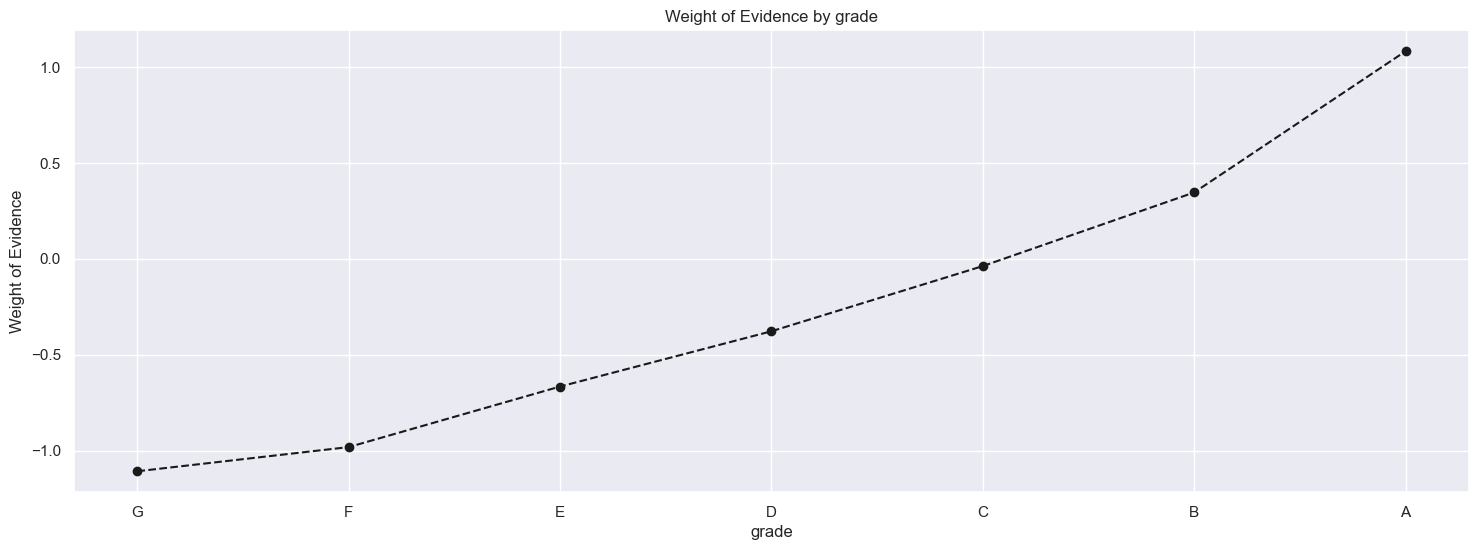

In [67]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [68]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     137   0.795620    0.000367     109.0     28.0   
1           NONE      40   0.850000    0.000107      34.0      6.0   
2           RENT  150599   0.887722    0.403720  133690.0  16909.0   
3            OWN   33295   0.905181    0.089256   30138.0   3157.0   
4       MORTGAGE  188956   0.914483    0.506546  172797.0  16159.0   
5            ANY       1   1.000000    0.000003       1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000324    0.000772 -0.869566             NaN       NaN  inf  
1     0.000101    0.000165 -0.494109        0.054380  0.375458  inf  
2     0.396978    0.466339 -0.161032        0.037722  0.333077  inf  
3     0.089492    0.087068  0.027455        0.017459  0.188487  inf  
4     0.513102    0.445655  0.140931        0.009302  0.113476  inf  
5     0.000003    0.000000       inf        0.085517       inf  inf

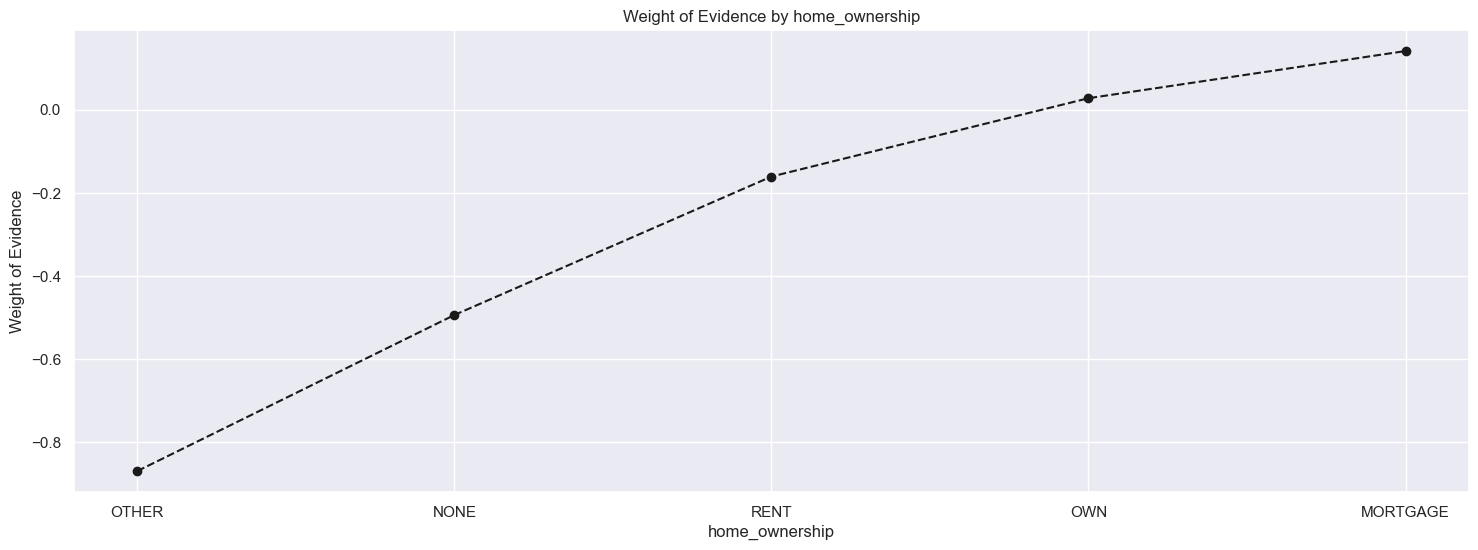

In [69]:
plot_by_woe(df_temp)

The categories 'OTHER' and 'NONE' are associated with the highest probability of default (There are very few loans associated with these categories, less than 0.1% each, check 'prop_n_obs' column in df_temp). 'ANY' has only one observation.

In these cases, we combine such underrepresented categories that are similar to them.

Let's combine 'OTHER', 'NONE' and 'ANY' with the riskiest category with enough number of observations - 'RENT'.

Borrowers with category 'OWN' have a considerably higher weight of evidence than the ones with category 'RENT', so these two categories will be in two different dummy variables.

The 'MORTGAGE' category encompasses about half of all borrowers. Hence, it will be in a separate dummy variable.

In sum, 3 categories: ('OTHER', 'NONE', 'ANY' and 'RENT), 'OWN', 'MORTGAGE'.

In [70]:
df_inputs_prepr['home_ownership:RENT_OOTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:ANY'], df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:OTHER']])

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [71]:
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [72]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     13   0.461538    0.000035      6.0     7.0     0.000018   
1          IA     13   0.769231    0.000035     10.0     3.0     0.000030   
2          NV   5221   0.880483    0.013996   4597.0   624.0     0.013650   
3          FL  25211   0.889215    0.067585  22418.0  2793.0     0.066568   
4          AL   4671   0.890387    0.012522   4159.0   512.0     0.012350   
5          NM   2075   0.892530    0.005563   1852.0   223.0     0.005499   
6          HI   2001   0.894553    0.005364   1790.0   211.0     0.005315   
7          MO   6017   0.894632    0.016130   5383.0   634.0     0.015984   
8          CA  57199   0.896432    0.153337  51275.0  5924.0     0.152256   
9          KY   3587   0.896850    0.009616   3217.0   370.0     0.009553   
10         VA  11366   0.897501    0.030470  10201.0  1165.0     0.030291   
11         NY  32211   0.897923    0.086350  28923.0  3288.0     0.085884   
12         NC  10204   0.897981    0.027355   9163.0  1041.0     0.027209   
13         UT   2756   0.898403    0.007388   2476.0   280.0     0.007352   
14         MD   8771   0.899441    0.023513   7889.0   882.0     0.023426   
15         NJ  14385   0.899826    0.038563  12944.0  1441.0     0.038436   
16         LA   4359   0.900206    0.011685   3924.0   435.0     0.011652   
17         OK   3284   0.900731    0.008804   2958.0   326.0     0.008783   
18         MI   9191   0.901425    0.024639   8285.0   906.0     0.024601   
19         TN   4845   0.902167    0.012988   4371.0   474.0     0.012979   
20         MN   6526   0.902697    0.017495   5891.0   635.0     0.017493   
21         AZ   8645   0.902718    0.023175   7804.0   841.0     0.023173   
22         DE   1064   0.903195    0.002852    961.0   103.0     0.002854   
23         PA  13090   0.903361    0.035091  11825.0  1265.0     0.035113   
24         AR   2760   0.903623    0.007399   2494.0   266.0     0.007406   
25         OH  12135   0.903997    0.032531  10970.0  1165.0     0.032574   
26         WA   8372   0.905399    0.022443   7580.0   792.0     0.022508   
27         MA   8858   0.906525    0.023746   8030.0   828.0     0.023844   
28         IN   5210   0.906910    0.013967   4725.0   485.0     0.014030   
29         GA  11960   0.907692    0.032062  10856.0  1104.0     0.032236   
30         RI   1647   0.908318    0.004415   1496.0   151.0     0.004442   
31         OR   4814   0.909015    0.012905   4376.0   438.0     0.012994   
32         WI   4740   0.911181    0.012707   4319.0   421.0     0.012825   
33         SD    801   0.911361    0.002147    730.0    71.0     0.002168   
34         CT   5775   0.913766    0.015481   5277.0   498.0     0.015669   
35         TX  29158   0.915392    0.078166  26691.0  2467.0     0.079256   
36         KS   3360   0.915774    0.009007   3077.0   283.0     0.009137   
37         IL  14833   0.916470    0.039764  13594.0  1239.0     0.040366   
38         MT   1103   0.916591    0.002957   1011.0    92.0     0.003002   
39         CO   7823   0.919596    0.020972   7194.0   629.0     0.021362   
40         SC   4448   0.920638    0.011924   4095.0   353.0     0.012160   
41         VT    727   0.921596    0.001949    670.0    57.0     0.001989   
42         AK   1003   0.923230    0.002689    926.0    77.0     0.002750   
43         MS    980   0.927551    0.002627    909.0    71.0     0.002699   
44         NH   1830   0.930601    0.004906   1703.0   127.0     0.005057   
45         WY    919   0.931447    0.002464    856.0    63.0     0.002542   
46         WV   1926   0.931464    0.005163   1794.0   132.0     0.005327   
47         DC   1129   0.940655    0.003027   1062.0    67.0     0.003153   
48         ME      2   1.000000    0.000005      2.0     0.0     0.000006   
49         ID     10   1.000000    0.000027     10.0     0.0     0.000030   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000193 -2

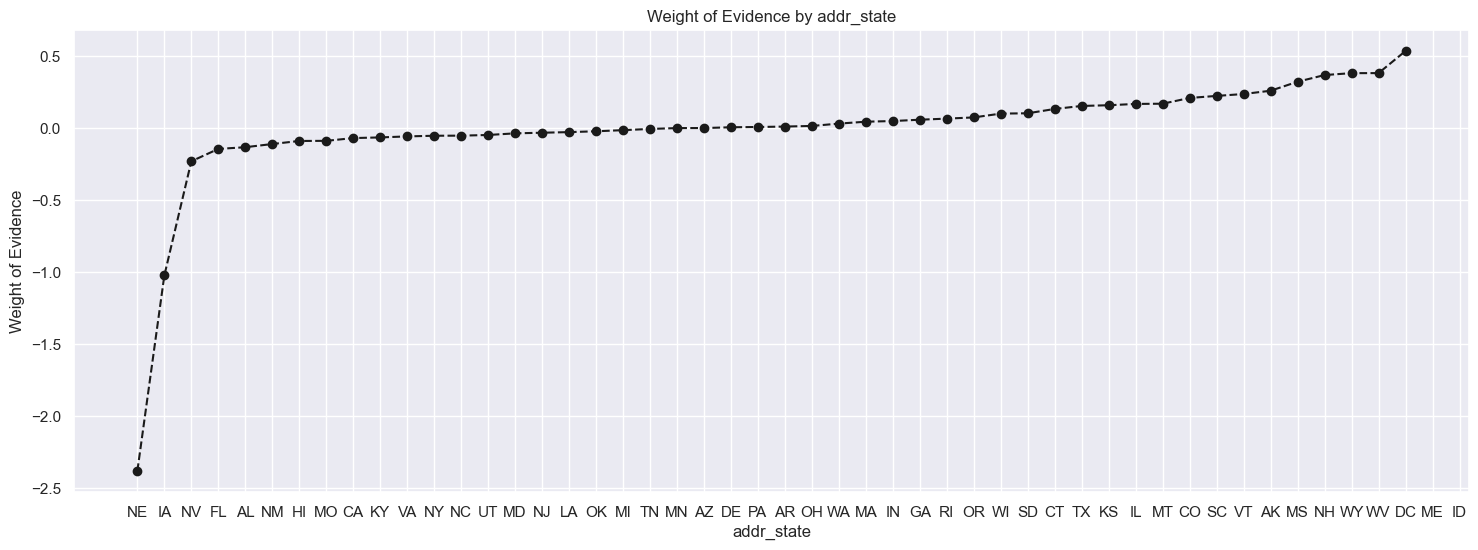

In [73]:
plot_by_woe(df_temp)

The missing state is North Dakota(ND).

In [74]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

From the plot, we can see that there are 2 states, Nebraska and Lowa, with a considerably lower weight of evidence compared too most states.

There are also 2 states with a considerably higher weight of evidence, Maine(ME) and Idaho(ID). Note that weight of evidence for the last state could not be calculated because there are no bad borrowers.

The other 46 categories appear to have very similar weight of evidence values compared to these three.

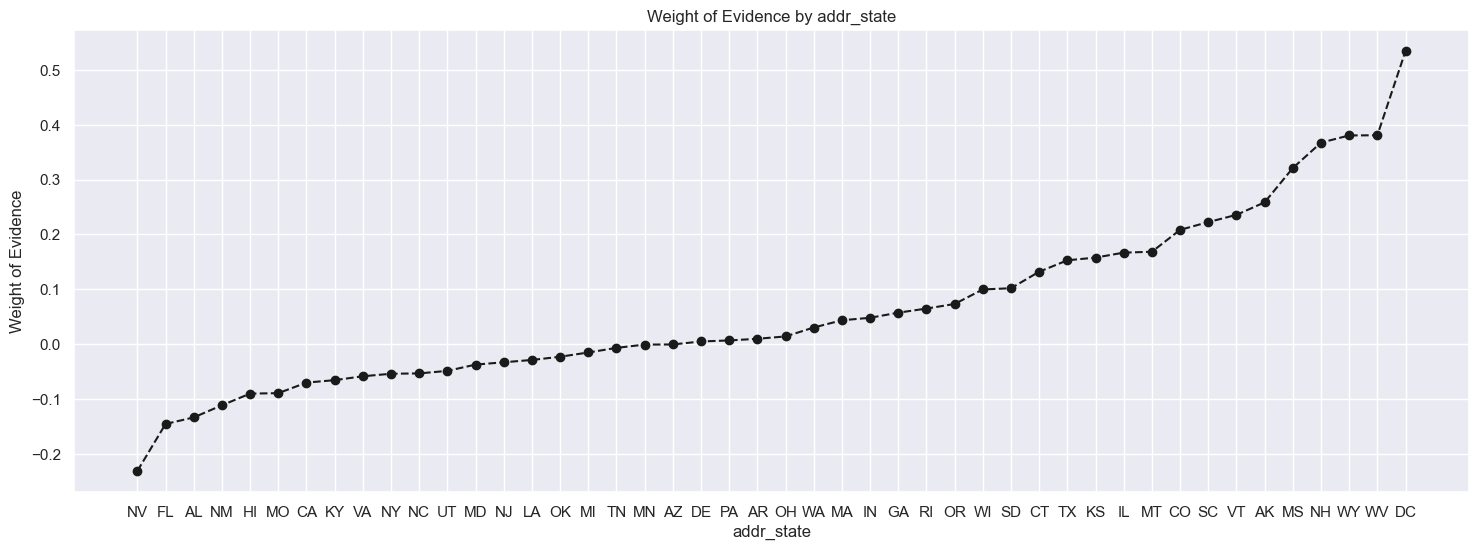

In [75]:
plot_by_woe(df_temp.iloc[2: -2, :])

We place the state we have no information about in the WORST (highest risk) category.
Our first dummy will include the first six states from results table, from NE to AL, plus NE. (NE, IA, ND, NV, FL, HI, AL)
The last 4 states displayed on the chart can be grouped together in one category based on their rather low number of observations, plus ME and ID. (WV, NH, WY, DC, ME, ID)

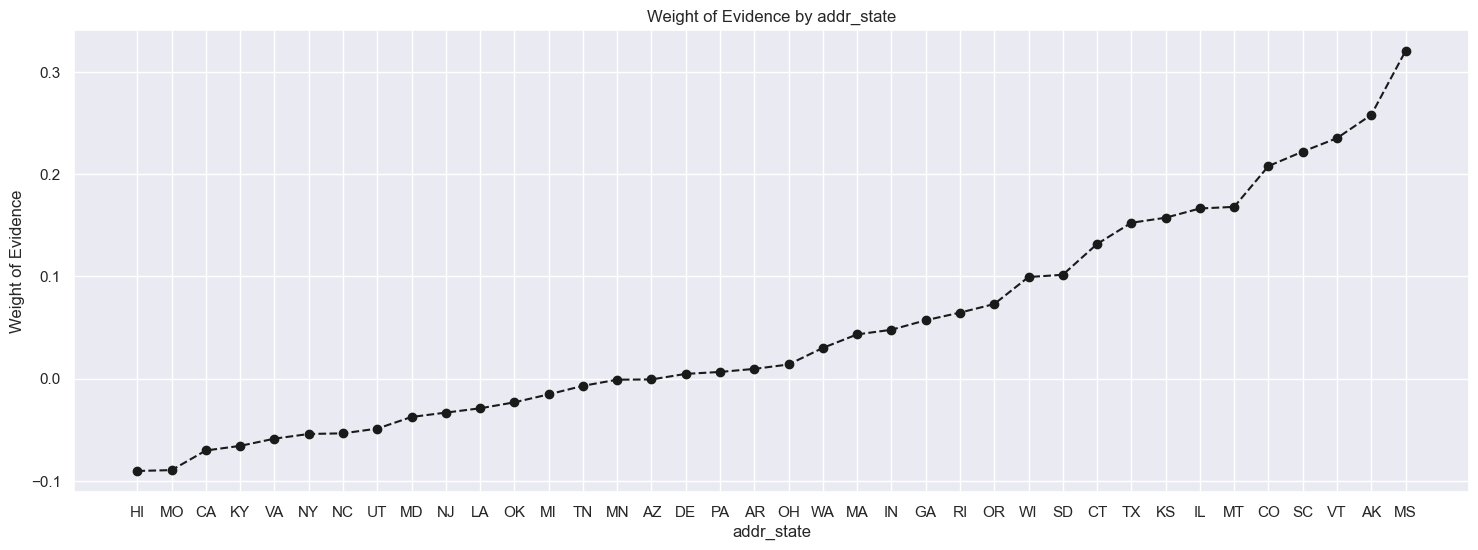

In [76]:
# the remaining 38 states
plot_by_woe(df_temp.iloc[6: -6, :])

NY and CA stand out with a particularly high number of borrowers, especially CA, so they to be in a separate dummy variable by itself. The rest of the states can either be all in one group or in several groups, depending on the increase in weight of evidence and separated by NY and CA in the plot. 

In [77]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [78]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  134414   0.885086    0.360332  118968.0  15446.0   
1     Source Verified  120030   0.910514    0.321772  109289.0  10741.0   
2        Not Verified  118584   0.915064    0.317896  108512.0  10072.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.353263    0.425991 -0.187205             NaN       NaN  0.02279  
1     0.324522    0.296230  0.091218        0.025428  0.278423  0.02279  
2     0.322215    0.277779  0.148392        0.004550  0.057174  0.02279

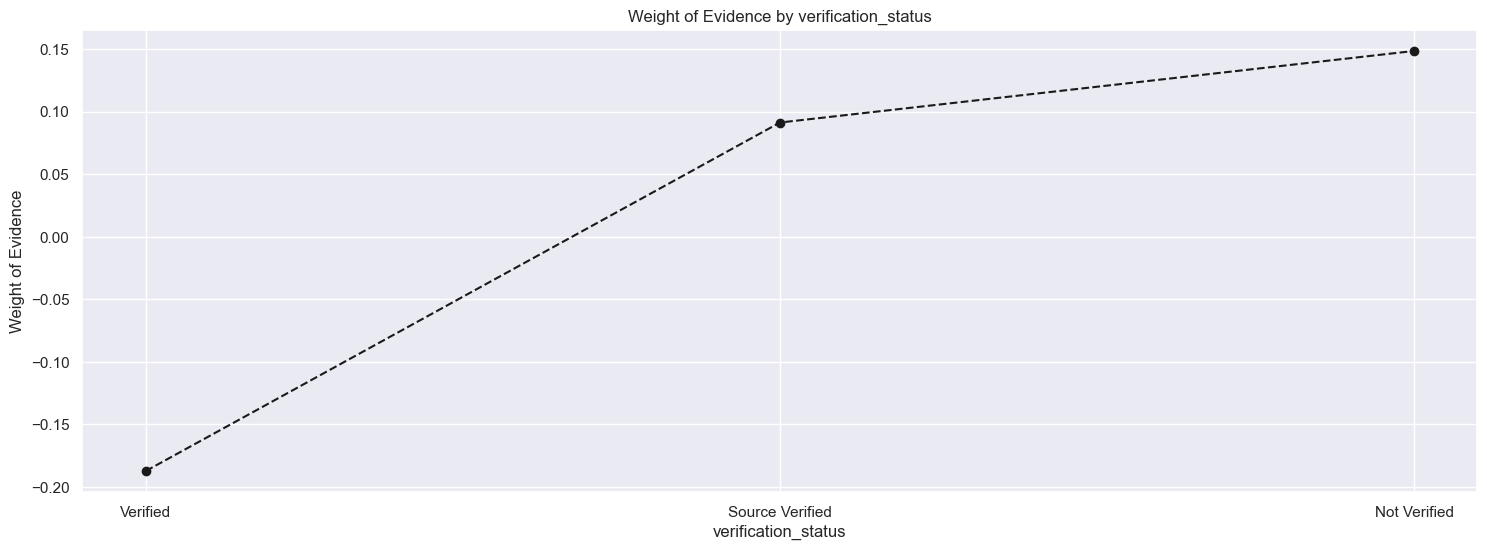

In [79]:
plot_by_woe(df_temp)

In [80]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    5582   0.795951    0.014964    4443.0   1139.0   
1          educational     333   0.801802    0.000893     267.0     66.0   
2               moving    2392   0.852425    0.006412    2039.0    353.0   
3     renewable_energy     281   0.871886    0.000753     245.0     36.0   
4                other   18884   0.873279    0.050624   16491.0   2393.0   
5                house    1830   0.873770    0.004906    1599.0    231.0   
6              medical    3684   0.881650    0.009876    3248.0    436.0   
7              wedding    1887   0.882883    0.005059    1666.0    221.0   
8             vacation    1991   0.890005    0.005337    1772.0    219.0   
9   debt_consolidation  219183   0.899997    0.587578  197264.0  21919.0   
10    home_improvement   21238   0.912562    0.056934   19381.0   1857.0   
11      major_purchase    7837   0.912594    0.021009    7152.0    685.0   
12                 car    4325   0.914451    0.011594    3955.0    370.0   
13         credit_card   83581   0.924217    0.224061   77247.0   6334.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.013193    0.031413 -0.867530             NaN       NaN  0.041638  
1      0.000793    0.001820 -0.831116        0.005851  0.036415  0.041638  
2      0.006055    0.009736 -0.474963        0.050623  0.356153  0.041638  
3      0.000728    0.000993 -0.310970        0.019461  0.163993  0.041638  
4      0.048968    0.065997 -0.298443        0.001393  0.012528  0.041638  
5      0.004748    0.006371 -0.293994        0.000492  0.004449  0.041638  
6      0.009645    0.012025 -0.220557        0.007880  0.073436  0.041638  
7      0.004947    0.006095 -0.208691        0.001233  0.011866  0.041638  
8      0.005262    0.006040 -0.137917        0.007122  0.070774  0.041638  
9      0.585755    0.604512 -0.031521        0.009992  0.106397  0.041638  
10     0.057550    0.051215  0.116621        0.012566  0.148142  0.041638  
11     0.021237    0.018892  0.117019        0.000032  0.000398  0.041638  
12     0.011744    0.010204  0.140523        0.001857  0.023504  0.041638  
13     0.229377    0.174688  0.272367        0.009766  0.131843  0.041638

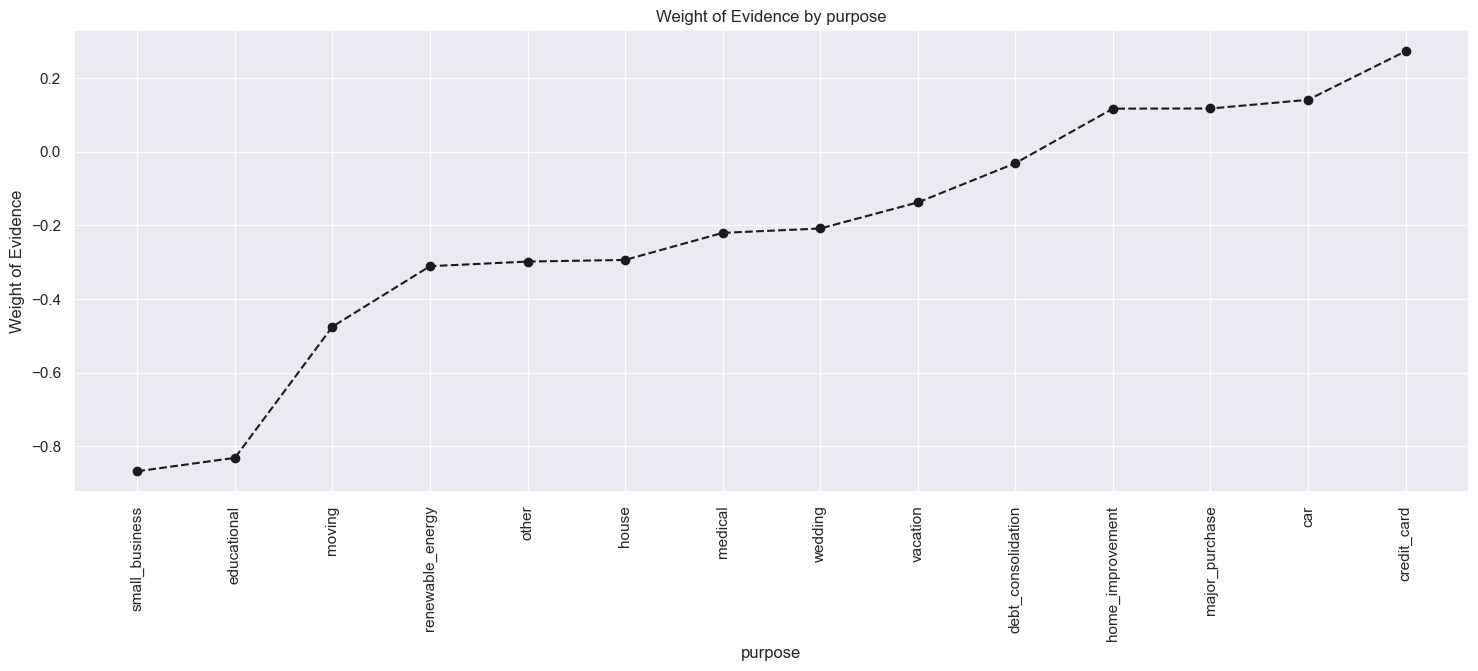

In [81]:
plot_by_woe(df_temp, 90)

In [82]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [83]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  242514   0.890213    0.650123  215889.0  26625.0   
1                   w  130514   0.926184    0.349877  120880.0   9634.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.64106      0.7343 -0.135796             NaN       NaN  0.040708  
1      0.35894      0.2657  0.300790        0.035972  0.436586  0.040708

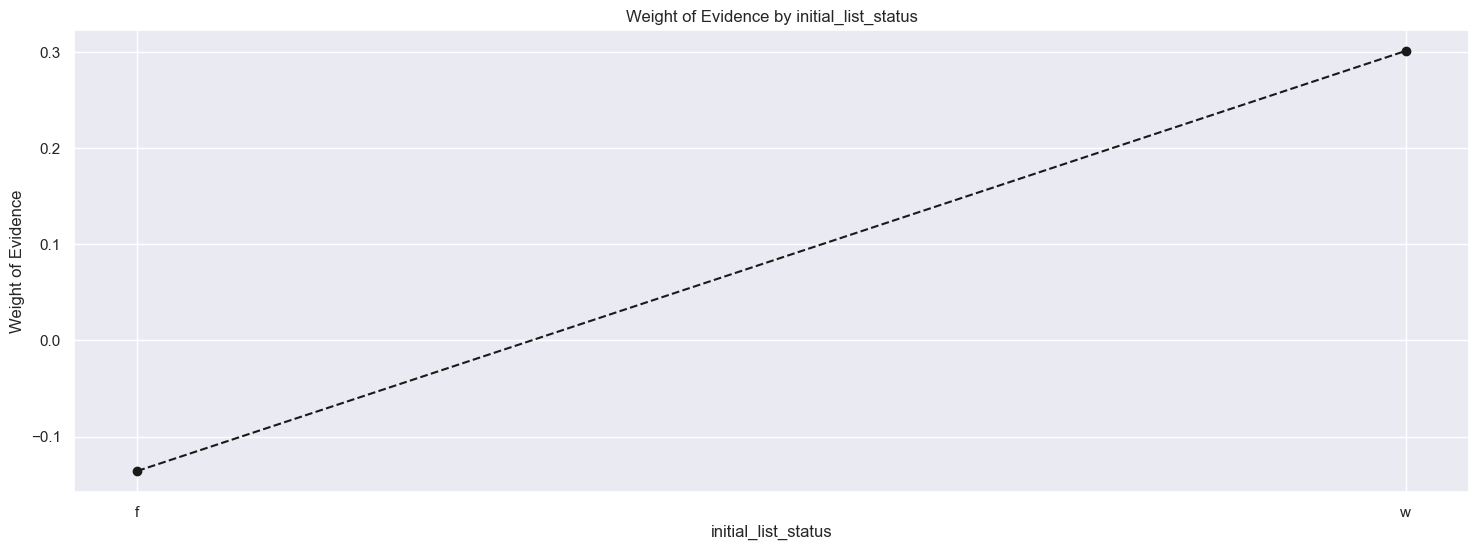

In [84]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [85]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [86]:
# term
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [87]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  270419   0.913216    0.724929  246951.0  23468.0     0.733295   
1        60  102609   0.875342    0.275071   89818.0  12791.0     0.266705   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.647232  0.124843             NaN       NaN  0.034813  
1    0.352768 -0.279666        0.037874  0.404509  0.034813

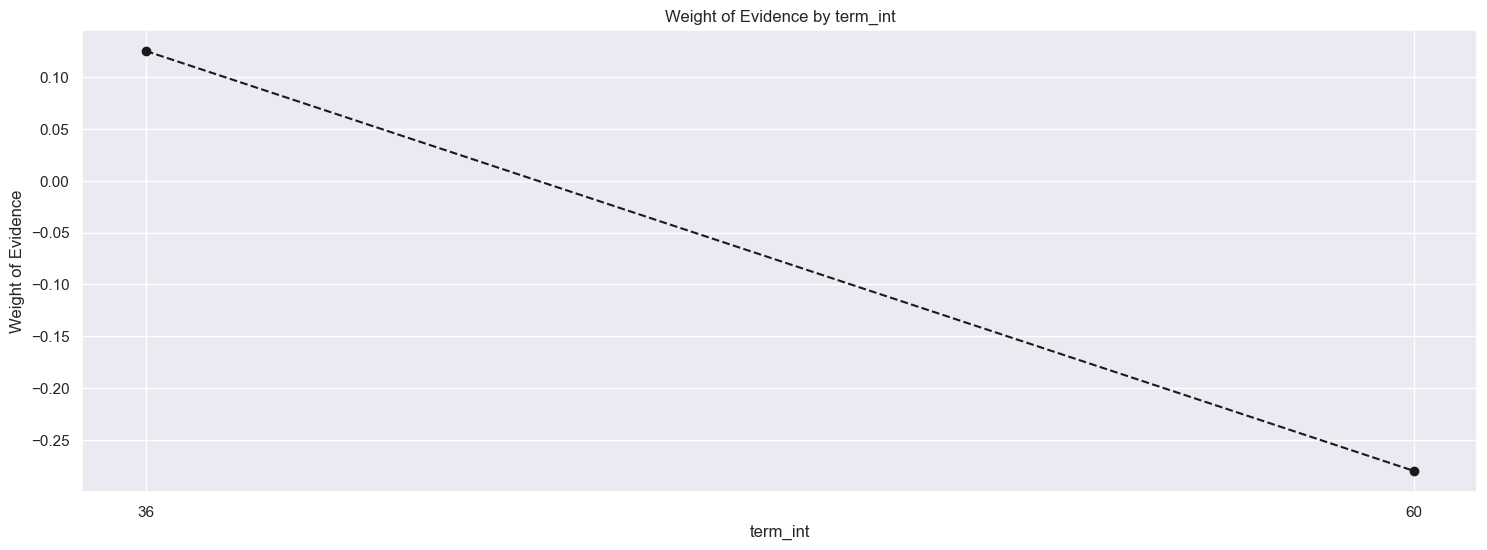

In [88]:
plot_by_woe(df_temp)

In [89]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [90]:
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [91]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   45720   0.889764    0.122565   40680.0   5040.0   
1              1.0   23654   0.898875    0.063411   21262.0   2392.0   
2              2.0   33078   0.902594    0.088674   29856.0   3222.0   
3              3.0   29205   0.902688    0.078292   26363.0   2842.0   
4              4.0   22468   0.900614    0.060231   20235.0   2233.0   
5              5.0   24602   0.895496    0.065952   22031.0   2571.0   
6              6.0   20887   0.896922    0.055993   18734.0   2153.0   
7              7.0   21049   0.899520    0.056427   18934.0   2115.0   
8              8.0   17853   0.903322    0.047860   16127.0   1726.0   
9              9.0   14267   0.900680    0.038246   12850.0   1417.0   
10            10.0  120245   0.912279    0.322348  109697.0  10548.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.120795    0.139000 -0.140379             NaN       NaN  0.007444  
1      0.063135    0.065970 -0.043918        0.009112  0.096461  0.007444  
2      0.088654    0.088861 -0.002326        0.003718  0.041592  0.007444  
3      0.078282    0.078381 -0.001256        0.000094  0.001070  0.007444  
4      0.060086    0.061585 -0.024642        0.002074  0.023386  0.007444  
5      0.065419    0.070907 -0.080554        0.005118  0.055912  0.007444  
6      0.055629    0.059378 -0.065232        0.001425  0.015322  0.007444  
7      0.056223    0.058330 -0.036805        0.002599  0.028427  0.007444  
8      0.047887    0.047602  0.005979        0.003801  0.042784  0.007444  
9      0.038157    0.039080 -0.023908        0.002642  0.029886  0.007444  
10     0.325734    0.290907  0.113076        0.011599  0.136984  0.007444

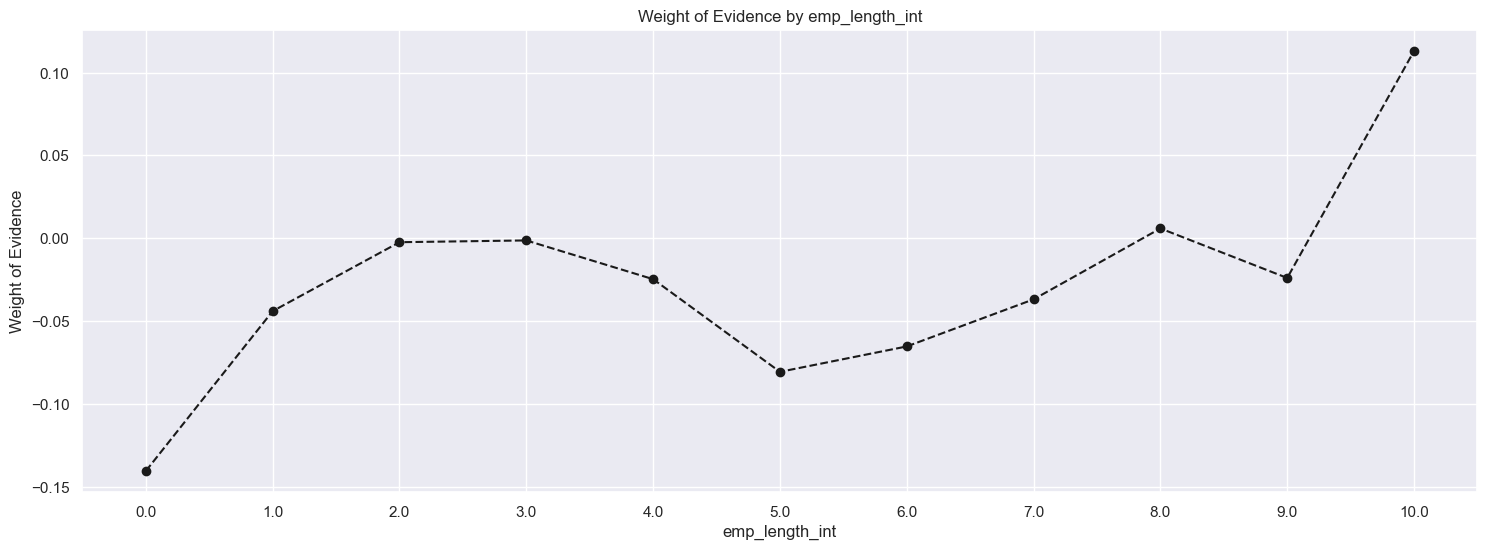

In [92]:
plot_by_woe(df_temp)

In [93]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [94]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [95]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [96]:
df_inputs_prepr['mths_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [97]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              (35.91, 37.8]  28170   0.961839    0.075517  27095.0  1075.0   
1               (37.8, 39.6]  39636   0.946690    0.106255  37523.0  2113.0   
2               (39.6, 41.4]  38614   0.934350    0.103515  36079.0  2535.0   
3               (41.4, 43.2]  29038   0.924409    0.077844  26843.0  2195.0   
4               (43.2, 45.0]  28367   0.918285    0.076045  26049.0  2318.0   
5               (45.0, 46.8]  12165   0.911961    0.032611  11094.0  1071.0   
6               (46.8, 48.6]  24451   0.912887    0.065547  22321.0  2130.0   
7               (48.6, 50.4]  22969   0.900953    0.061574  20694.0  2275.0   
8               (50.4, 52.2]  20640   0.890165    0.055331  18373.0  2267.0   
9               (52.2, 54.0]  18312   0.877730    0.049090  16073.0  2239.0   
10              (54.0, 55.8]   8286   0.866401    0.022213   7179.0  1107.0   
11              (55.8, 57.6]  14120   0.872663    0.037852  12322.0  1798.0   
12              (57.6, 59.4]  11529   0.866684    0.030907   9992.0  1537.0   
13              (59.4, 61.2]   9974   0.860036    0.026738   8578.0  1396.0   
14              (61.2, 63.0]   9811   0.854857    0.026301   8387.0  1424.0   
15              (63.0, 64.8]   4304   0.846190    0.011538   3642.0   662.0   
16              (64.8, 66.6]   6723   0.827458    0.018023   5563.0  1160.0   
17              (66.6, 68.4]   5334   0.842707    0.014299   4495.0   839.0   
18              (68.4, 70.2]   4377   0.848983    0.011734   3716.0   661.0   
19              (70.2, 72.0]   3868   0.829628    0.010369   3209.0   659.0   
20              (72.0, 73.8]   1785   0.855462    0.004785   1527.0   258.0   
21              (73.8, 75.6]   3395   0.854786    0.009101   2902.0   493.0   
22              (75.6, 77.4]   3055   0.856956    0.008190   2618.0   437.0   
23              (77.4, 79.2]   2849   0.842401    0.007637   2400.0   449.0   
24              (79.2, 81.0]   2412   0.853234    0.006466   2058.0   354.0   
25              (81.0, 82.8]   1044   0.870690    0.002799    909.0   135.0   
26              (82.8, 84.6]   2182   0.870761    0.005849   1900.0   282.0   
27              (84.6, 86.4]   1997   0.855283    0.005353   1708.0   289.0   
28              (86.4, 88.2]   1921   0.834461    0.005150   1603.0   318.0   
29              (88.2, 90.0]   1870   0.842246    0.005013   1575.0   295.0   
30              (90.0, 91.8]    795   0.859119    0.002131    683.0   112.0   
31              (91.8, 93.6]   1373   0.890750    0.003681   1223.0   150.0   
32              (93.6, 95.4]   1087   0.874885    0.002914    951.0   136.0   
33              (95.4, 97.2]   1044   0.882184    0.002799    921.0   123.0   
34              (97.2, 99.0]    877   0.856328    0.002351    751.0   126.0   
35             (99.0, 100.8]    346   0.878613    0.000928    304.0    42.0   
36            (100.8, 102.6]    647   0.863988    0.001734    559.0    88.0   
37            (102.6, 104.4]    542   0.850554    0.001453    461.0    81.0   
38            (104.4, 106.2]    497   0.869215    0.001332    432.0    65.0   
39            (106.2, 108.0]    403   0.853598    0.001080    344.0    59.0   
40            (108.0, 109.8]    173   0.803468    0.000464    139.0    34.0   
41            (109.8, 111.6]    139   0.834532    0.000373    116.0    23.0   
42            (111.6, 113.4]    204   0.799020    0.000547    163.0    41.0   
43            (113.4, 115.2]    182   0.796703    0.000488    145.0    37.0   
44            (115.2, 117.0]    530   0.762264    0.001421    404.0   126.0   
45            (117.0, 118.8]    247   0.797571    0.000662    197.0    50.0   
46            (118.8, 120.6]    394   0.723350    0.001056    285.0   109.0   
47            (120.6, 122.4]    176   0.704545    0.000472    124.0    52.0   
48            (122.4, 124.2]    104   0.750000    0.000279     78.0    26.0   
49            (124.2, 126.0]     70   0.885714    0.0

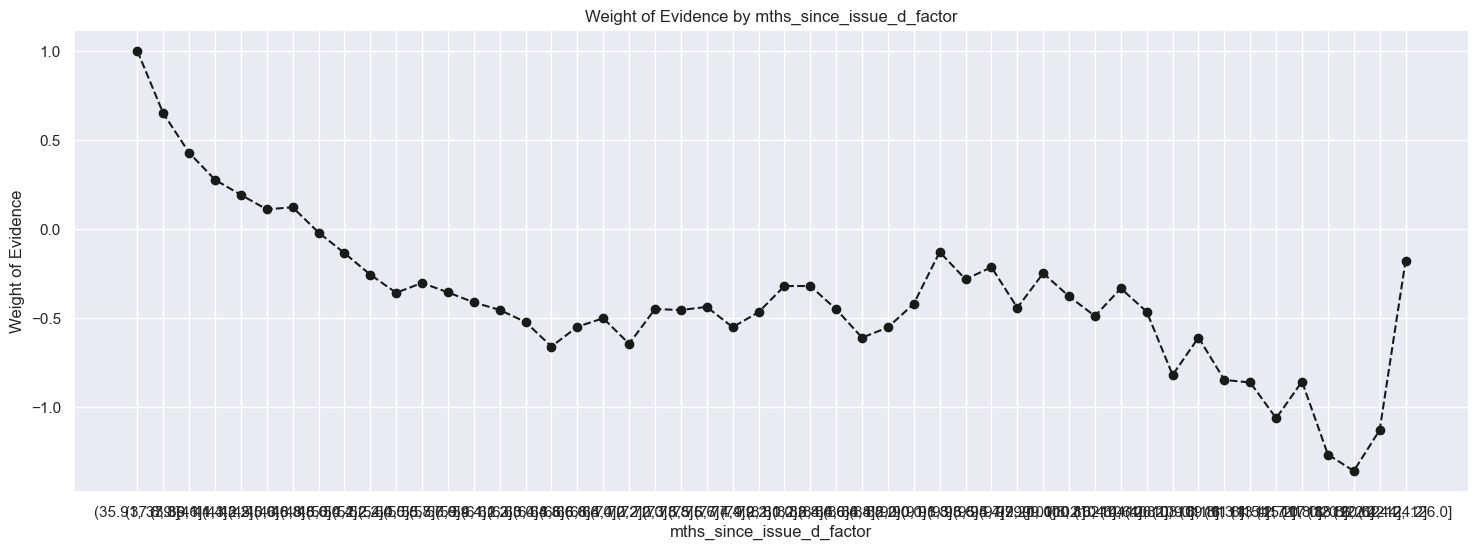

In [98]:
plot_by_woe(df_temp)

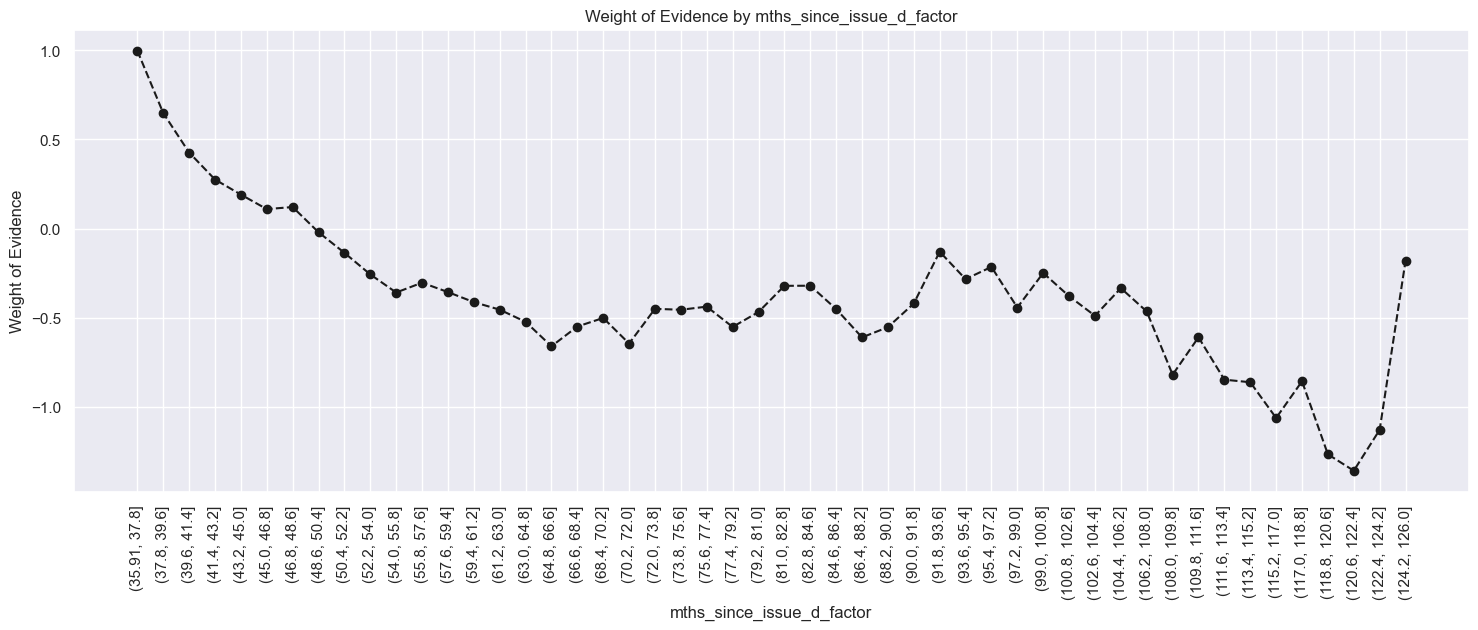

In [99]:
plot_by_woe(df_temp, 90)

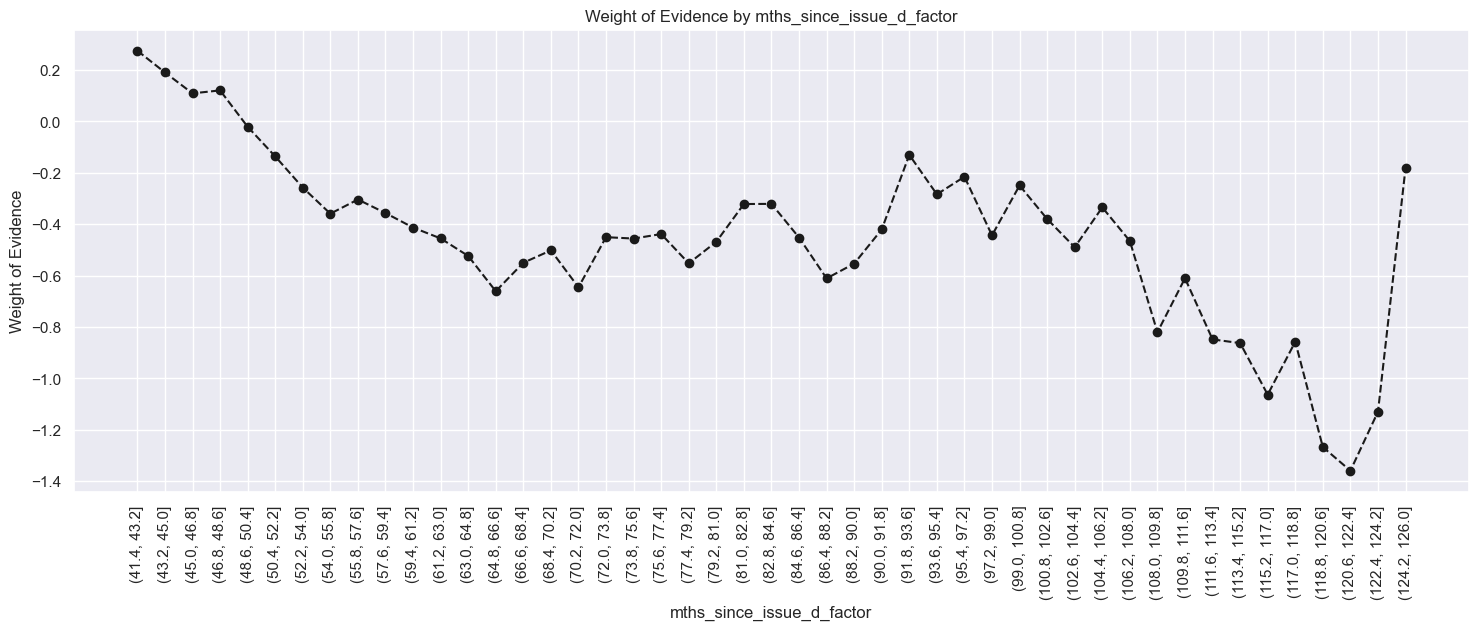

In [100]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [101]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [102]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [103]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    785   0.961783    0.002104    755.0    30.0   
1     (5.833, 6.246]   8459   0.982149    0.022677   8308.0   151.0   
2     (6.246, 6.658]   7826   0.974572    0.020980   7627.0   199.0   
3     (6.658, 7.071]   1816   0.974119    0.004868   1769.0    47.0   
4     (7.071, 7.484]   3143   0.980274    0.008426   3081.0    62.0   
5     (7.484, 7.897]  12581   0.966219    0.033727  12156.0   425.0   
6      (7.897, 8.31]   9687   0.954062    0.025969   9242.0   445.0   
7      (8.31, 8.722]   6594   0.973612    0.017677   6420.0   174.0   
8     (8.722, 9.135]   9539   0.940979    0.025572   8976.0   563.0   
9     (9.135, 9.548]   6681   0.971711    0.017910   6492.0   189.0   
10    (9.548, 9.961]   7588   0.937533    0.020342   7114.0   474.0   
11   (9.961, 10.374]  10941   0.940408    0.029330  10289.0   652.0   
12  (10.374, 10.786]   5857   0.918730    0.015701   5381.0   476.0   
13  (10.786, 11.199]  17851   0.937370    0.047854  16733.0  1118.0   
14  (11.199, 11.612]   4876   0.923298    0.013071   4502.0   374.0   
15  (11.612, 12.025]  15597   0.942297    0.041812  14697.0   900.0   
16  (12.025, 12.438]  12336   0.899481    0.033070  11096.0  1240.0   
17   (12.438, 12.85]  11065   0.934659    0.029663  10342.0   723.0   
18   (12.85, 13.263]  21329   0.915092    0.057178  19518.0  1811.0   
19  (13.263, 13.676]  15392   0.922297    0.041262  14196.0  1196.0   
20  (13.676, 14.089]  10991   0.911109    0.029464  10014.0   977.0   
21  (14.089, 14.502]  23436   0.900282    0.062826  21099.0  2337.0   
22  (14.502, 14.914]   4333   0.872606    0.011616   3781.0   552.0   
23  (14.914, 15.327]  18932   0.895151    0.050752  16947.0  1985.0   
24   (15.327, 15.74]  12327   0.906952    0.033046  11180.0  1147.0   
25   (15.74, 16.153]   7477   0.849271    0.020044   6350.0  1127.0   
26  (16.153, 16.566]  12991   0.876684    0.034826  11389.0  1602.0   
27  (16.566, 16.978]   4237   0.857682    0.011358   3634.0   603.0   
28  (16.978, 17.391]  11396   0.869252    0.030550   9906.0  1490.0   
29  (17.391, 17.804]  12288   0.858724    0.032941  10552.0  1736.0   
30  (17.804, 18.217]   1306   0.839204    0.003501   1096.0   210.0   
31   (18.217, 18.63]  11036   0.852664    0.029585   9410.0  1626.0   
32   (18.63, 19.042]   6808   0.837397    0.018251   5701.0  1107.0   
33  (19.042, 19.455]   4425   0.817401    0.011862   3617.0   808.0   
34  (19.455, 19.868]   6763   0.844004    0.018130   5708.0  1055.0   
35  (19.868, 20.281]   4899   0.854052    0.013133   4184.0   715.0   
36  (20.281, 20.694]   3221   0.814964    0.008635   2625.0   596.0   
37  (20.694, 21.106]   4016   0.824203    0.010766   3310.0   706.0   
38  (21.106, 21.519]   2729   0.799560    0.007316   2182.0   547.0   
39  (21.519, 21.932]    989   0.775531    0.002651    767.0   222.0   
40  (21.932, 22.345]   3476   0.815305    0.009318   2834.0   642.0   
41  (22.345, 22.758]   2251   0.779653    0.006034   1755.0   496.0   
42   (22.758, 23.17]   1535   0.788274    0.004115   1210.0   325.0   
43   (23.17, 23.583]   2652   0.804676    0.007109   2134.0   518.0   
44  (23.583, 23.996]   1573   0.742530    0.004217   1168.0   405.0   
45  (23.996, 24.409]   1455   0.795189    0.003901   1157.0   298.0   
46  (24.409, 24.822]   1664   0.787861    0.004461   1311.0   353.0   
47  (24.822, 25.234]   1315   0.790114    0.003525   1039.0   276.0   
48  (25.234, 25.647]    778   0.775064    0.002086    603.0   175.0   
49   (25.647, 26.06]   1786   0.790594    0.004788   1412.0   374.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002242    0.000827  0.996811             NaN       NaN  0.345435  
1      0.024670    0.004164  1.778985        0.020366  0.782174  0.345435  
2      0.022648    0.005488  1.417435        0.007577  0.361549  0.345435  
3      0.005253    0.001296  1.399312        0.000453  0.018123  0.345435  
4  

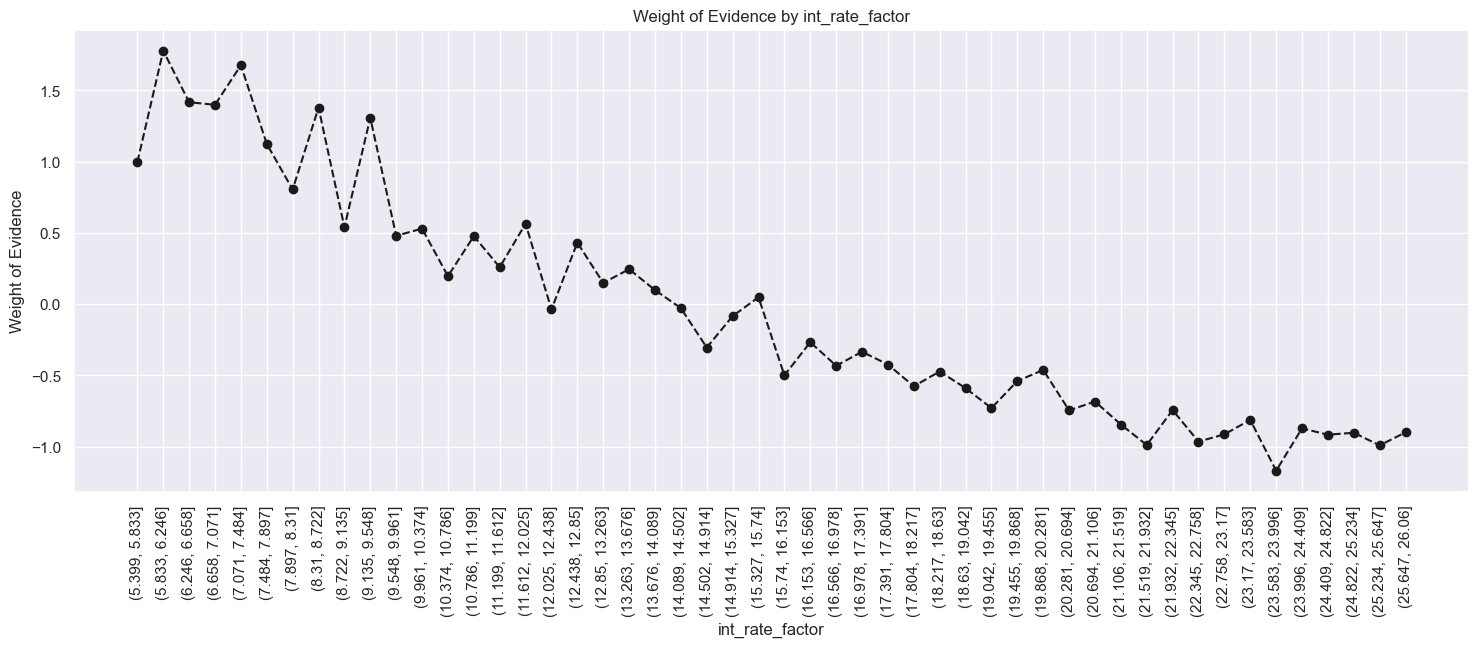

In [104]:
plot_by_woe(df_temp, 90)

In [105]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [106]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1190.0]   1224   0.913399    0.003281   1118.0   106.0   
1     (1190.0, 1880.0]   3028   0.908520    0.008117   2751.0   277.0   
2     (1880.0, 2570.0]   6018   0.899634    0.016133   5414.0   604.0   
3     (2570.0, 3260.0]   7248   0.895695    0.019430   6492.0   756.0   
4     (3260.0, 3950.0]   4751   0.896864    0.012736   4261.0   490.0   
5     (3950.0, 4640.0]   9023   0.898703    0.024189   8109.0   914.0   
6     (4640.0, 5330.0]  15903   0.902471    0.042632  14352.0  1551.0   
7     (5330.0, 6020.0]  17236   0.914307    0.046206  15759.0  1477.0   
8     (6020.0, 6710.0]   6914   0.896731    0.018535   6200.0   714.0   
9     (6710.0, 7400.0]  11806   0.910300    0.031649  10747.0  1059.0   
10    (7400.0, 8090.0]  17692   0.907981    0.047428  16064.0  1628.0   
11    (8090.0, 8780.0]   6316   0.895028    0.016932   5653.0   663.0   
12    (8780.0, 9470.0]   9168   0.892343    0.024577   8181.0   987.0   
13   (9470.0, 10160.0]  33410   0.907902    0.089564  30333.0  3077.0   
14  (10160.0, 10850.0]   6755   0.890303    0.018109   6014.0   741.0   
15  (10850.0, 11540.0]   8559   0.893679    0.022945   7649.0   910.0   
16  (11540.0, 12230.0]  23506   0.914745    0.063014  21502.0  2004.0   
17  (12230.0, 12920.0]   4802   0.889213    0.012873   4270.0   532.0   
18  (12920.0, 13610.0]   7247   0.908928    0.019427   6587.0   660.0   
19  (13610.0, 14300.0]   8123   0.907423    0.021776   7371.0   752.0   
20  (14300.0, 14990.0]   5183   0.889639    0.013894   4611.0   572.0   
21  (14990.0, 15680.0]  21757   0.911569    0.058325  19833.0  1924.0   
22  (15680.0, 16370.0]  11788   0.896166    0.031601  10564.0  1224.0   
23  (16370.0, 17060.0]   6538   0.886968    0.017527   5799.0   739.0   
24  (17060.0, 17750.0]   3422   0.880187    0.009174   3012.0   410.0   
25  (17750.0, 18440.0]  11441   0.896862    0.030671  10261.0  1180.0   
26  (18440.0, 19130.0]   3919   0.882368    0.010506   3458.0   461.0   
27  (19130.0, 19820.0]   4004   0.875624    0.010734   3506.0   498.0   
28  (19820.0, 20510.0]  20287   0.912801    0.054385  18518.0  1769.0   
29  (20510.0, 21200.0]   6712   0.907628    0.017993   6092.0   620.0   
30  (21200.0, 21890.0]   2081   0.864969    0.005579   1800.0   281.0   
31  (21890.0, 22580.0]   4114   0.903500    0.011029   3717.0   397.0   
32  (22580.0, 23270.0]   2445   0.894888    0.006554   2188.0   257.0   
33  (23270.0, 23960.0]   1825   0.865205    0.004892   1579.0   246.0   
34  (23960.0, 24650.0]   9836   0.915819    0.026368   9008.0   828.0   
35  (24650.0, 25340.0]  10074   0.902224    0.027006   9089.0   985.0   
36  (25340.0, 26030.0]   1832   0.884825    0.004911   1621.0   211.0   
37  (26030.0, 26720.0]   1252   0.853834    0.003356   1069.0   183.0   
38  (26720.0, 27410.0]   1510   0.882781    0.004048   1333.0   177.0   
39  (27410.0, 28100.0]   6457   0.920861    0.017310   5946.0   511.0   
40  (28100.0, 28790.0]    795   0.876730    0.002131    697.0    98.0   
41  (28790.0, 29480.0]   1176   0.880952    0.003153   1036.0   140.0   
42  (29480.0, 30170.0]   7308   0.900794    0.019591   6583.0   725.0   
43  (30170.0, 30860.0]    567   0.848325    0.001520    481.0    86.0   
44  (30860.0, 31550.0]    884   0.900452    0.002370    796.0    88.0   
45  (31550.0, 32240.0]   1326   0.893665    0.003555   1185.0   141.0   
46  (32240.0, 32930.0]    631   0.893819    0.001692    564.0    67.0   
47  (32930.0, 33620.0]   1090   0.909174    0.002922    991.0    99.0   
48  (33620.0, 34310.0]    492   0.904472    0.001319    445.0    47.0   
49  (34310.0, 35000.0]  13553   0.897218    0.036332  12160.0  1393.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003320    0.002923  0.127148             NaN       NaN  0.014711  
1      0.008169    0.007639  0.066993        0.004878  0.060155  0.014711  
2      0.016076    0.016658 -0.035540        0.00888

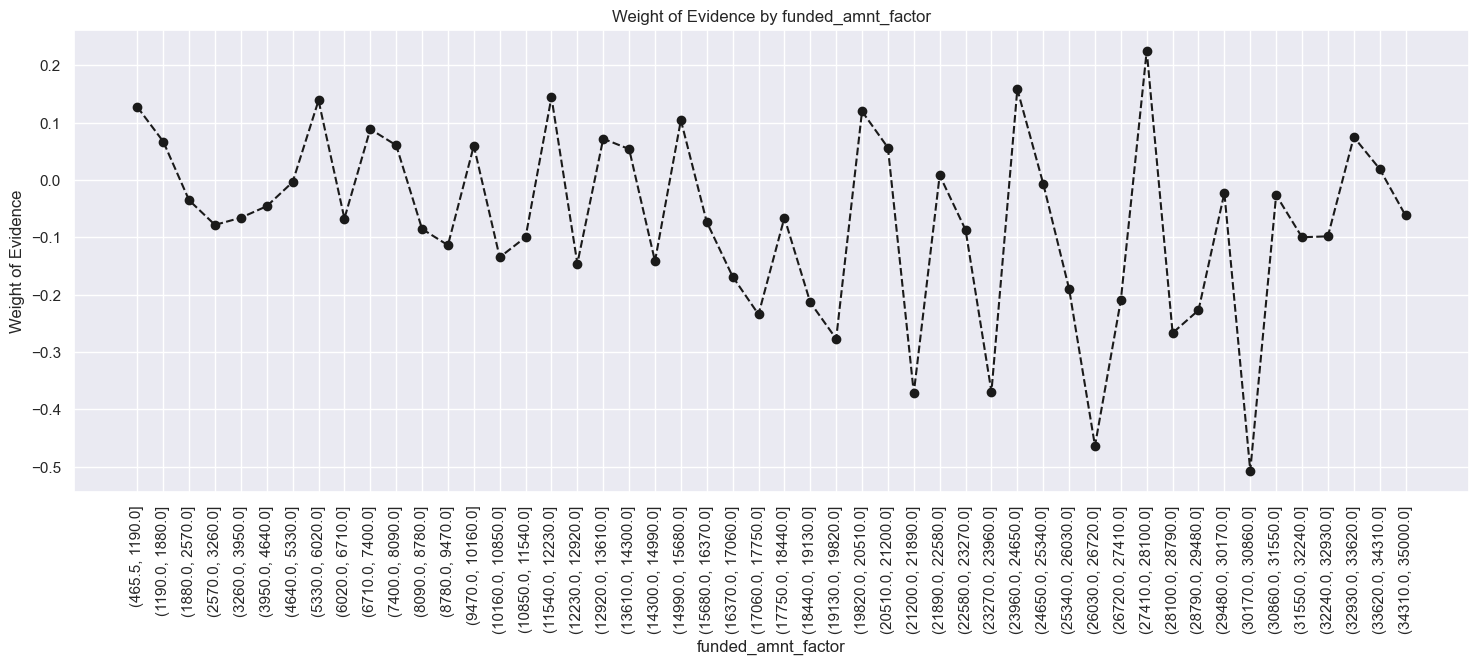

In [107]:
plot_by_woe(df_temp, 90)

There seems to be no association whatsoever between 'funded amount' and WoE, so there is no need to create dummy variables.

In [108]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (-0.587, 11.74]     24   0.875000    0.000064     21.0   
1                      (11.74, 23.48]      0        NaN    0.000000      NaN   
2                      (23.48, 35.22]      0        NaN    0.000000      NaN   
3                      (35.22, 46.96]      0        NaN    0.000000      NaN   
4                       (46.96, 58.7]      0        NaN    0.000000      NaN   
5                       (58.7, 70.44]      0        NaN    0.000000      NaN   
6                      (70.44, 82.18]    722   0.925208    0.001936    668.0   
7                      (82.18, 93.92]   1929   0.900985    0.005171   1738.0   
8                     (93.92, 105.66]   2817   0.878949    0.007552   2476.0   
9                     (105.66, 117.4]   5092   0.889238    0.013650   4528.0   
10                    (117.4, 129.14]   9217   0.879245    0.024709   8104.0   
11                   (129.14, 140.88]  11701   0.878899    0.031368  10284.0   
12                   (140.88, 152.62]  13568   0.888709    0.036373  12058.0   
13                   (152.62, 164.36]  16266   0.893643    0.043605  14536.0   
14                    (164.36, 176.1]  19391   0.897684    0.051983  17407.0   
15                    (176.1, 187.84]  20434   0.899432    0.054779  18379.0   
16                   (187.84, 199.58]  26096   0.896957    0.069957  23407.0   
17                   (199.58, 211.32]  28421   0.897118    0.076190  25497.0   
18                   (211.32, 223.06]  27027   0.898620    0.072453  24287.0   
19                    (223.06, 234.8]  21901   0.898680    0.058711  19682.0   
20                    (234.8, 246.54]  19682   0.901585    0.052763  17745.0   
21                   (246.54, 258.28]  18090   0.905970    0.048495  16389.0   
22                   (258.28, 270.02]  17958   0.906114    0.048141  16272.0   
23                   (270.02, 281.76]  14875   0.912403    0.039876  13572.0   
24                    (281.76, 293.5]  14211   0.912462    0.038096  12967.0   
25                    (293.5, 305.24]  10240   0.917676    0.027451   9397.0   
26                   (305.24, 316.98]   7616   0.917017    0.020417   6984.0   
27                   (316.98, 328.72]   8603   0.912821    0.023063   7853.0   
28                   (328.72, 340.46]   8307   0.918864    0.022269   7633.0   
29                    (340.46, 352.2]   7243   0.914400    0.019417   6623.0   
30                    (352.2, 363.94]   5532   0.920282    0.014830   5091.0   
31                   (363.94, 375.68]   5446   0.918472    0.014599   5002.0   
32                   (375.68, 387.42]   4640   0.923060    0.012439   4283.0   
33                   (387.42, 399.16]   4203   0.921247    0.011267   3872.0   
34                    (399.16, 410.9]   3494   0.914711    0.009367   3196.0   
35                    (410.9, 422.64]   3068   0.918188    0.008225   2817.0   
36                   (422.64, 434.38]   2283   0.920718    0.006120   2102.0   
37                   (434.38, 446.12]   1788   0.938479    0.004793   1678.0   
38                   (446.12, 457.86]   1481   0.918298    0.003970   1360.0   
39                    (457.86, 469.6]   1612   0.918734    0.004321   1481.0   
40                    (469.6, 481.34]   1582   0.920986    0.004241   1457.0   
41                   (481.34, 493.08]   1248   0.921474    0.003346   1150.0   
42                   (493.08, 504.82]    849   0.926973    0.002276    787.0   
43                   (504.82, 516.56]    762   0.919948    0.002043    701.0   
44                    (516.56, 528.3]    642   0.917445    0.001721    589.0   
45                    (528.3, 540.04]    580   0.922414    0.001555    535.0   
46                   (540.04, 551.78]    471   0.921444    0.001263    434.0   
47                   (551.78, 563.52]    339   0.917404    0.000909    311.0   
48                   (563.52, 575.26]    347   0.902017    0.000930    313.0   
49 

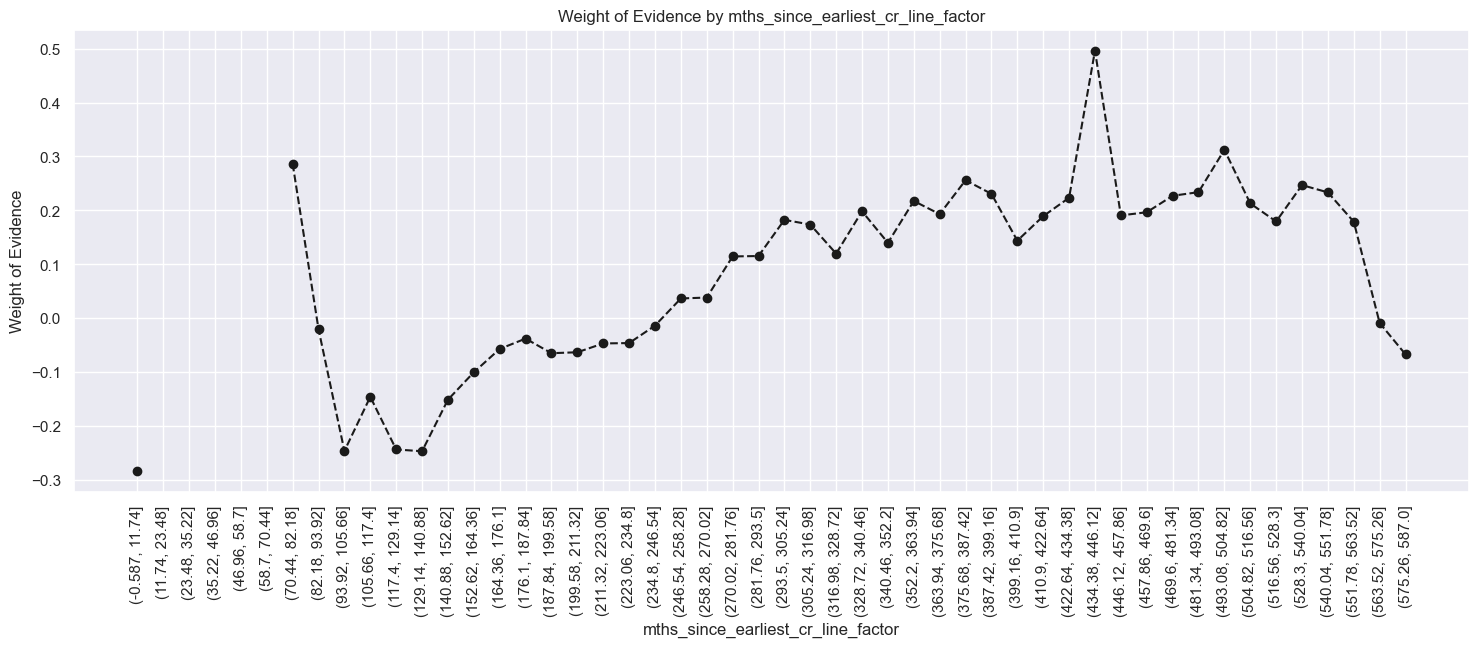

In [109]:
plot_by_woe(df_temp, 90)

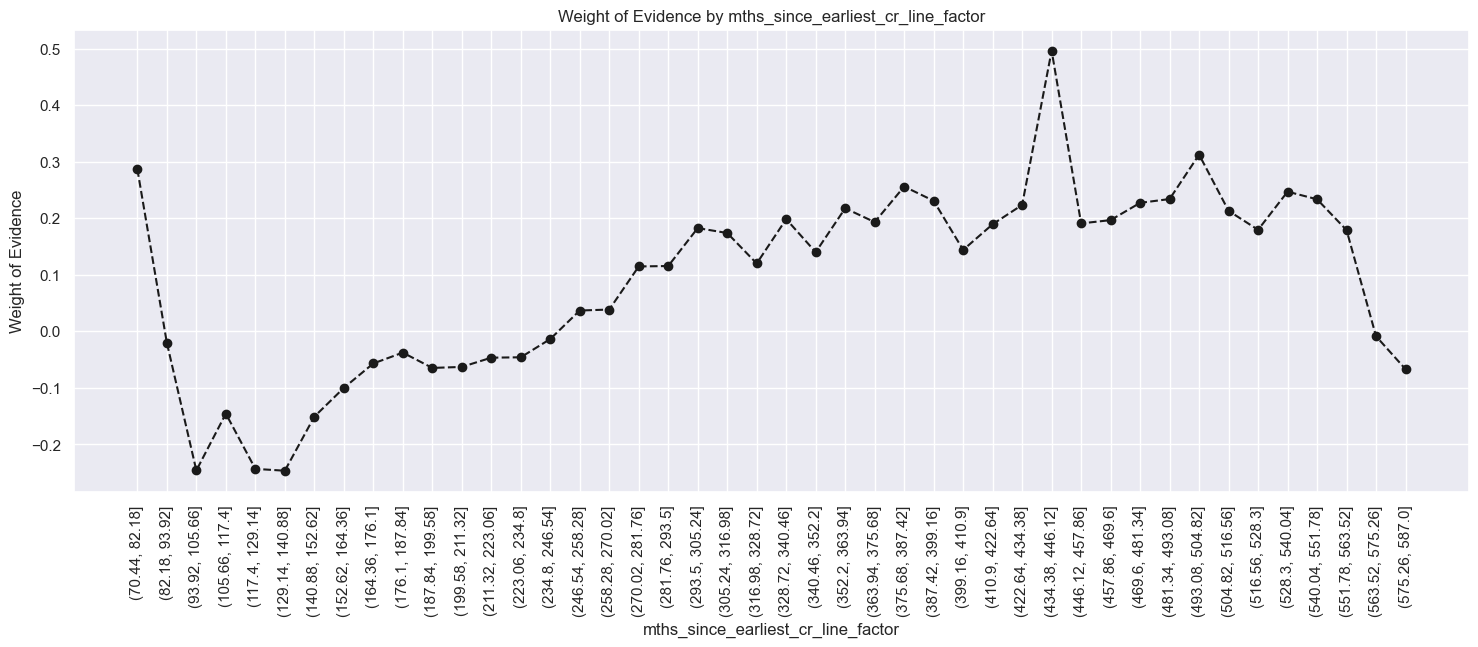

In [110]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [111]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [112]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  306417   0.902120    0.821432  276425.0  29992.0   
1           1.0   44927   0.906693    0.120439   40735.0   4192.0   
2           2.0   13118   0.904787    0.035166   11869.0   1249.0   
3           3.0    4550   0.901758    0.012197    4103.0    447.0   
4           4.0    1868   0.910600    0.005008    1701.0    167.0   
5           5.0     966   0.894410    0.002590     864.0    102.0   
6           6.0     501   0.922156    0.001343     462.0     39.0   
7           7.0     279   0.885305    0.000748     247.0     32.0   
8           8.0     148   0.932432    0.000397     138.0     10.0   
9           9.0      89   0.898876    0.000239      80.0      9.0   
10         10.0      56   0.910714    0.000150      51.0      5.0   
11         11.0      31   0.903226    0.000083      28.0      3.0   
12         12.0      30   0.766667    0.000080      23.0      7.0   
13         13.0      18   0.944444    0.000048      17.0      1.0   
14         14.0       6   0.833333    0.000016       5.0      1.0   
15         15.0       6   0.833333    0.000016       5.0      1.0   
16         16.0       4   1.000000    0.000011       4.0      0.0   
17         17.0       3   0.666667    0.000008       2.0      1.0   
18         18.0       3   0.666667    0.000008       2.0      1.0   
19         19.0       2   1.000000    0.000005       2.0      0.0   
20         21.0       2   1.000000    0.000005       2.0      0.0   
21         22.0       2   1.000000    0.000005       2.0      0.0   
22         24.0       1   1.000000    0.000003       1.0      0.0   
23         29.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.820815    0.827160 -0.007701             NaN       NaN  inf  
1      0.120958    0.115613  0.045200        0.004573  0.052901  inf  
2      0.035244    0.034447  0.022877        0.001906  0.022323  inf  
3      0.012183    0.012328 -0.011795        0.003029  0.034672  inf  
4      0.005051    0.004606  0.092268        0.008841  0.104063  inf  
5      0.002566    0.002813 -0.092110        0.016190  0.184378  inf  
6      0.001372    0.001076  0.243294        0.027746  0.335403  inf  
7      0.000733    0.000883 -0.185057        0.036851  0.428351  inf  
8      0.000410    0.000276  0.395959        0.047128  0.581016  inf  
9      0.000238    0.000248 -0.043908        0.033556  0.439867  inf  
10     0.000151    0.000138  0.093678        0.011838  0.137586  inf  
11     0.000083    0.000083  0.004883        0.007488  0.088795  inf  
12     0.000068    0.000193 -1.039126        0.136559  1.044008  inf  
13     0.000050    0.000028  0.604504        0.177778  1.643629  inf  
14     0.000015    0.000028 -0.619272        0.111111  1.223775  inf  
15     0.000015    0.000028 -0.619272        0.000000  0.000000  inf  
16     0.000012    0.000000       inf        0.166667       inf  inf  
17     0.000006    0.000028 -1.535562        0.333333       inf  inf  
18     0.000006    0.000028 -1.535562        0.000000  0.000000  inf  
19     0.000006    0.000000       inf        0.333333       inf  inf  
20     0.000006    0.000000       inf        0.000000       NaN  inf  
21     0.000006    0.000000       inf        0.000000       NaN  inf  
22     0.000003    0.000000       inf        0.000000       NaN  inf  
23     0.000003    0.000000       inf        0.000000       NaN  inf

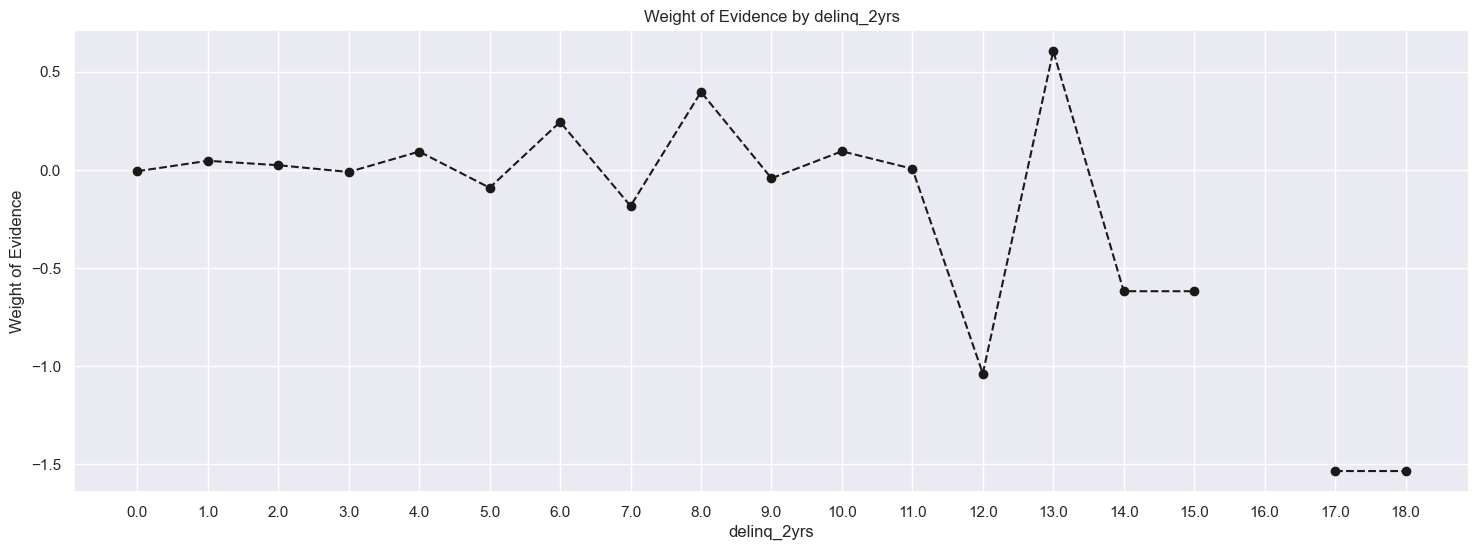

In [113]:
plot_by_woe(df_temp)

In [114]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [115]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

/Users/mang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  193232   0.919511    0.518009  177679.0  15553.0   
1              1.0  104163   0.897804    0.279236   93518.0  10645.0   
2              2.0   46214   0.877786    0.123889   40566.0   5648.0   
3              3.0   20040   0.853543    0.053723   17105.0   2935.0   
4              4.0    5810   0.861790    0.015575    5007.0    803.0   
5              5.0    2217   0.839874    0.005943    1862.0    355.0   
6              6.0     977   0.803480    0.002619     785.0    192.0   
7              7.0     159   0.679245    0.000426     108.0     51.0   
8              8.0     101   0.643564    0.000271      65.0     36.0   
9              9.0      43   0.674419    0.000115      29.0     14.0   
10            10.0      17   0.882353    0.000046      15.0      2.0   
11            11.0       8   0.625000    0.000021       5.0      3.0   
12            12.0      12   0.500000    0.000032       6.0      6.0   
13            13.0       5   0.800000    0.000013       4.0      1.0   
14            14.0       5   0.200000    0.000013       1.0      4.0   
15            15.0       9   0.444444    0.000024       4.0      5.0   
16            16.0       3   1.000000    0.000008       3.0      0.0   
17            17.0       2   0.500000    0.000005       1.0      1.0   
18            18.0       2   0.500000    0.000005       1.0      1.0   
19            19.0       1   1.000000    0.000003       1.0      0.0   
20            20.0       1   0.000000    0.000003       0.0      1.0   
21            24.0       1   1.000000    0.000003       1.0      0.0   
22            25.0       1   0.000000    0.000003       0.0      1.0   
23            27.0       1   1.000000    0.000003       1.0      0.0   
24            28.0       1   1.000000    0.000003       1.0      0.0   
25            31.0       1   1.000000    0.000003       1.0      0.0   
26            32.0       1   0.000000    0.000003       0.0      1.0   
27            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.527599    0.428942  0.207015             NaN       NaN  inf  
1      0.277692    0.293582 -0.055646        0.021707  0.262661  inf  
2      0.120456    0.155768 -0.257081        0.020018  0.201435  inf  
3      0.050791    0.080945 -0.466046        0.024243  0.208965  inf  
4      0.014868    0.022146 -0.398472        0.008247  0.067574  inf  
5      0.005529    0.009791 -0.571421        0.021916  0.172949  inf  
6      0.002331    0.005295 -0.820521        0.036394  0.249100  inf  
7      0.000321    0.001407 -1.478404        0.124235  0.657883  inf  
8      0.000193    0.000993 -1.637841        0.035681  0.159437  inf  
9      0.000086    0.000386 -1.500471        0.030854  0.137370  inf  
10     0.000045    0.000055 -0.213807        0.207934  1.286665  inf  
11     0.000015    0.000083 -1.717884        0.257353  1.504077  inf  
12     0.000018    0.000165 -2.228710        0.125000  0.510826  inf  
13     0.000012    0.000028 -0.842415        0.300000  1.386294  inf  
14     0.000003    0.000110 -3.615004        0.600000  2.772589  inf  
15     0.000012    0.000138 -2.451853        0.244444  1.163151  inf  
16     0.000009    0.000000       inf        0.555556       inf  inf  
17     0.000003    0.000028 -2.228710        0.500000       inf  inf  
18     0.000003    0.000028 -2.228710        0.000000  0.000000  inf  
19     0.000003    0.000000       inf        0.500000       inf  inf  
20     0.000000    0.000028      -inf        1.000000       inf  inf  
21     0.000003    0.000000       inf        1.000000       inf  inf  
22     0.000000    0.000028      -inf        1.000000       inf  inf  
23     0.000003    0.000000       inf        1.000000       inf  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf 

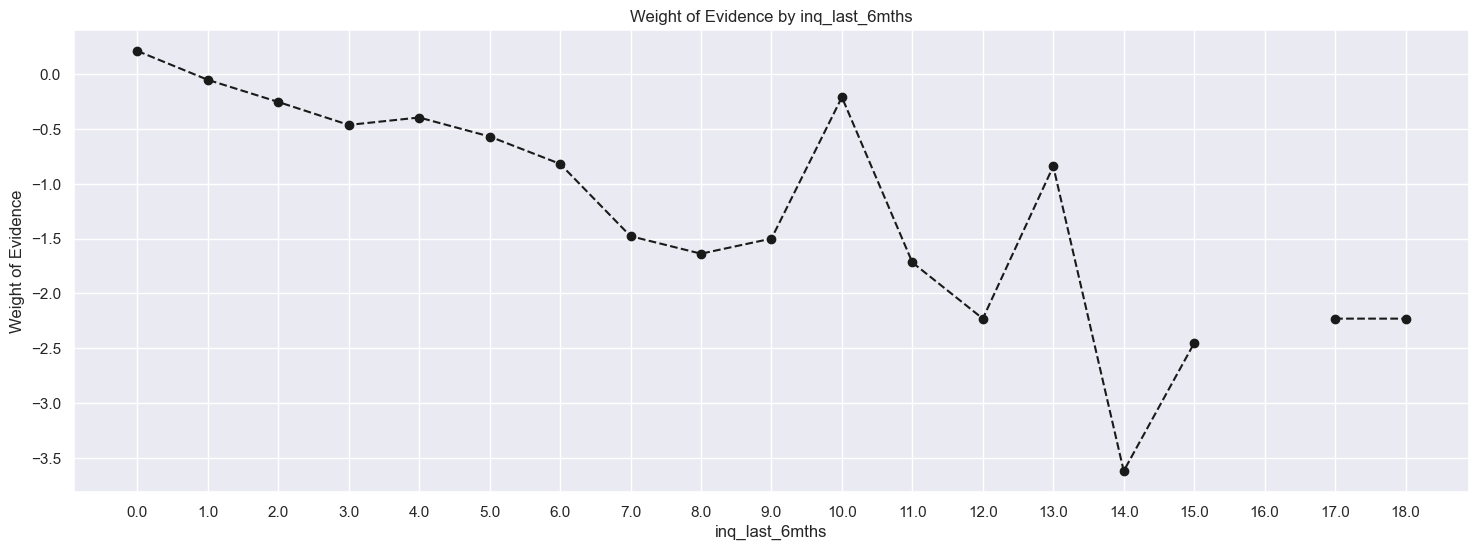

In [116]:
plot_by_woe(df_temp)

In [117]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [118]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0     29   0.793103    0.000078     23.0     6.0     0.000068   
1        1.0    110   0.872727    0.000295     96.0    14.0     0.000285   
2        2.0   1456   0.852335    0.003903   1241.0   215.0     0.003685   
3        3.0   4378   0.881910    0.011736   3861.0   517.0     0.011465   
4        4.0  10028   0.898783    0.026883   9013.0  1015.0     0.026763   
5        5.0  17141   0.901056    0.045951  15445.0  1696.0     0.045862   
6        6.0  24621   0.902157    0.066003  22212.0  2409.0     0.065956   
7        7.0  30169   0.902715    0.080876  27234.0  2935.0     0.080868   
8        8.0  33579   0.902201    0.090017  30295.0  3284.0     0.089958   
9        9.0  35251   0.901336    0.094500  31773.0  3478.0     0.094347   
10      10.0  33936   0.903200    0.090974  30651.0  3285.0     0.091015   
11      11.0  31372   0.898508    0.084101  28188.0  3184.0     0.083701   
12      12.0  27699   0.901946    0.074254  24983.0  2716.0     0.074184   
13      13.0  23892   0.906998    0.064049  21670.0  2222.0     0.064347   
14      14.0  19770   0.902529    0.052999  17843.0  1927.0     0.052983   
15      15.0  16228   0.905719    0.043503  14698.0  1530.0     0.043644   
16      16.0  13540   0.907607    0.036298  12289.0  1251.0     0.036491   
17      17.0  10712   0.905807    0.028716   9703.0  1009.0     0.028812   
18      18.0   8606   0.908785    0.023071   7821.0   785.0     0.023224   
19      19.0   6836   0.903745    0.018326   6178.0   658.0     0.018345   
20      20.0   5224   0.908691    0.014004   4747.0   477.0     0.014096   
21      21.0   4242   0.909712    0.011372   3859.0   383.0     0.011459   
22      22.0   3313   0.907637    0.008881   3007.0   306.0     0.008929   
23      23.0   2530   0.914625    0.006782   2314.0   216.0     0.006871   
24      24.0   1979   0.910056    0.005305   1801.0   178.0     0.005348   
25      25.0   1542   0.902724    0.004134   1392.0   150.0     0.004133   
26      26.0   1064   0.916353    0.002852    975.0    89.0     0.002895   
27      27.0    863   0.915411    0.002313    790.0    73.0     0.002346   
28      28.0    613   0.928222    0.001643    569.0    44.0     0.001690   
29      29.0    496   0.897177    0.001330    445.0    51.0     0.001321   
30      30.0    377   0.907162    0.001011    342.0    35.0     0.001016   
31      31.0    285   0.919298    0.000764    262.0    23.0     0.000778   
32      32.0    234   0.923077    0.000627    216.0    18.0     0.000641   
33      33.0    175   0.897143    0.000469    157.0    18.0     0.000466   
34      34.0    145   0.924138    0.000389    134.0    11.0     0.000398   
35      35.0    124   0.935484    0.000332    116.0     8.0     0.000344   
36      36.0    104   0.884615    0.000279     92.0    12.0     0.000273   
37      37.0     79   0.911392    0.000212     72.0     7.0     0.000214   
38      38.0     64   0.890625    0.000172     57.0     7.0     0.000169   
39      39.0     55   0.945455    0.000147     52.0     3.0     0.000154   
40      40.0     30   0.933333    0.000080     28.0     2.0     0.000083   
41      41.0     30   0.866667    0.000080     26.0     4.0     0.000077   
42      42.0     22   0.954545    0.000059     21.0     1.0     0.000062   
43      43.0     15   0.800000    0.000040     12.0     3.0     0.000036   
44      44.0     12   0.916667    0.000032     11.0     1.0     0.000033   
45      45.0     14   0.928571    0.000038     13.0     1.0     0.000039   
46      46.0      5   1.000000    0.000013      5.0     0.0     0.000015   
47      47.0      6   0.833333    0.000016      5.0     1.0     0.000015   
48      48.0      4   1.000000    0.000011      4.0     0.0     0.000012   
49      49.0      6   1.000000    0.000016      6.0     0.0     0.000018   
50      50.0      4   1.000000    0.000011      4.0     0.0     0.000012   
51      51.0      5   1.000000    0.000013      5.0 

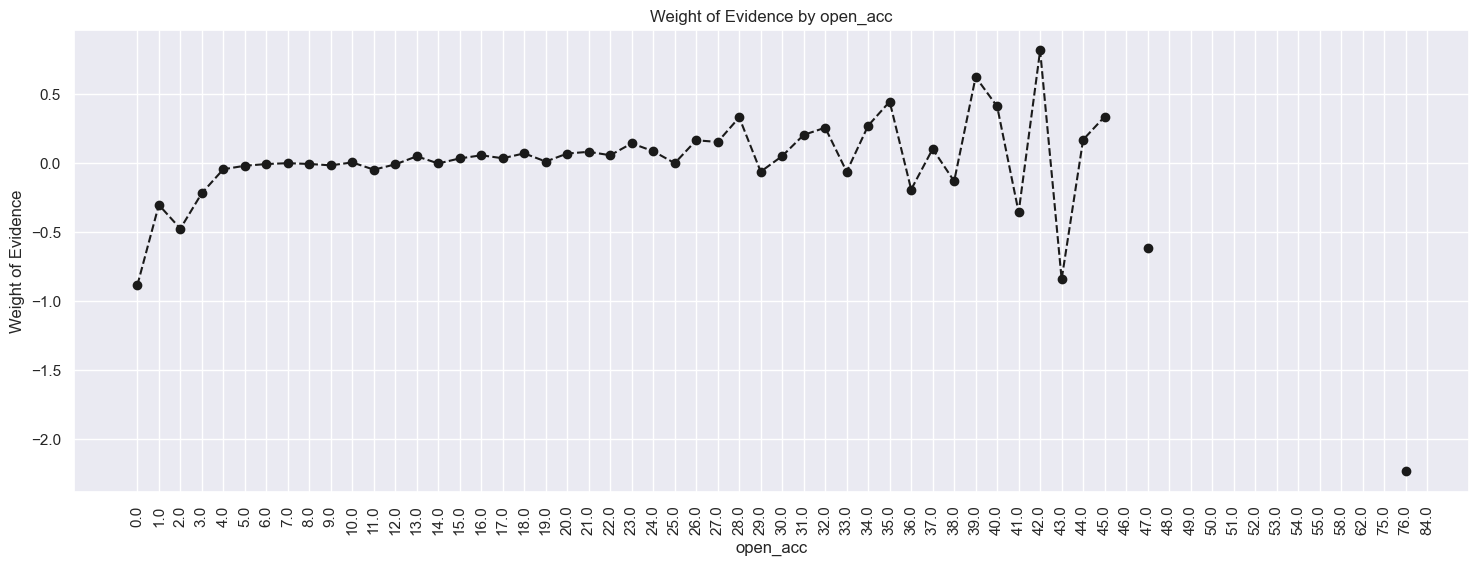

In [119]:
plot_by_woe(df_temp, 90)

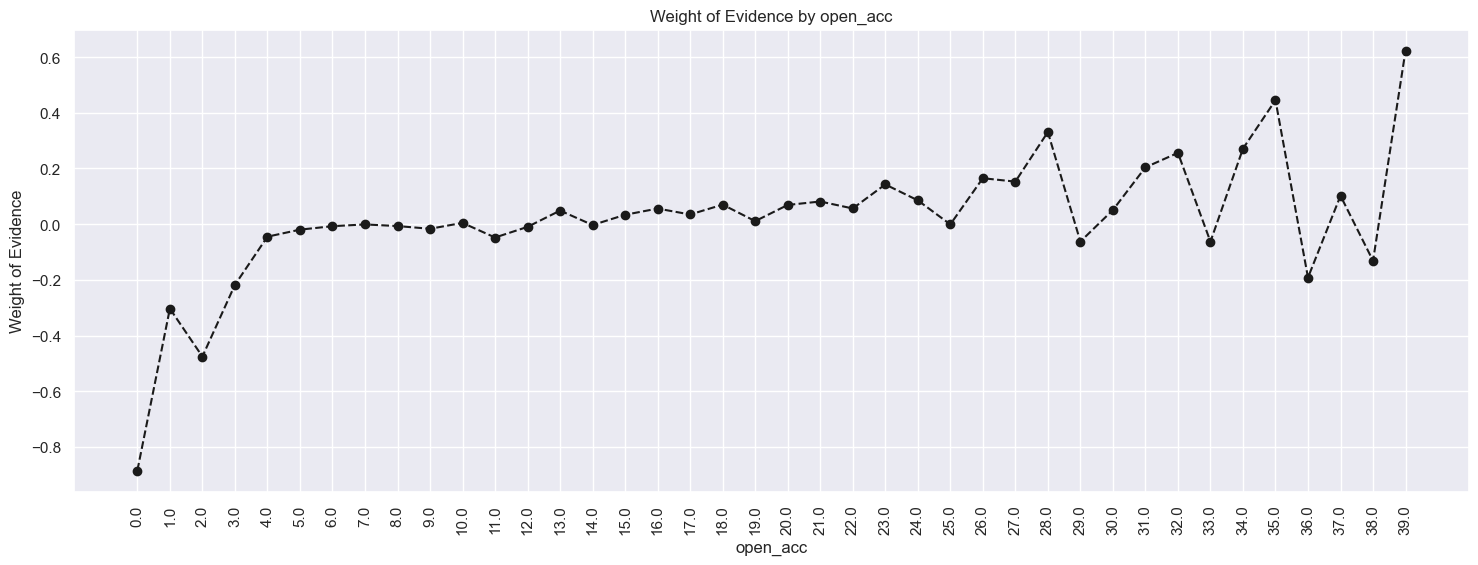

In [120]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [121]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [122]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  323999   0.901666    0.868565  292139.0  31860.0     0.867476   
1       1.0   42381   0.908332    0.113613   38496.0   3885.0     0.114310   
2       2.0    4527   0.915617    0.012136    4145.0    382.0     0.012308   
3       3.0    1280   0.938281    0.003431    1201.0     79.0     0.003566   
4       4.0     408   0.936275    0.001094     382.0     26.0     0.001134   
5       5.0     203   0.926108    0.000544     188.0     15.0     0.000558   
6       6.0     117   0.931624    0.000314     109.0      8.0     0.000324   
7       7.0      48   0.958333    0.000129      46.0      2.0     0.000137   
8       8.0      24   1.000000    0.000064      24.0      0.0     0.000071   
9       9.0      14   0.857143    0.000038      12.0      2.0     0.000036   
10     10.0      10   1.000000    0.000027      10.0      0.0     0.000030   
11     11.0       3   1.000000    0.000008       3.0      0.0     0.000009   
12     12.0       1   1.000000    0.000003       1.0      0.0     0.000003   
13     13.0       2   1.000000    0.000005       2.0      0.0     0.000006   
14     15.0       1   1.000000    0.000003       1.0      0.0     0.000003   
15     16.0       1   1.000000    0.000003       1.0      0.0     0.000003   
16     17.0       1   1.000000    0.000003       1.0      0.0     0.000003   
17     18.0       2   1.000000    0.000005       2.0      0.0     0.000006   
18     19.0       1   1.000000    0.000003       1.0      0.0     0.000003   
19     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     34.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.878678 -0.012831             NaN       NaN  inf  
1     0.107146  0.064722        0.006665  0.077553  inf  
2     0.010535  0.155528        0.007286  0.090806  inf  
3     0.002179  0.492752        0.022664  0.337225  inf  
4     0.000717  0.458614        0.002007  0.034138  inf  
5     0.000414  0.299682        0.010166  0.158932  inf  
6     0.000221  0.383197        0.005516  0.083515  inf  
7     0.000055  0.906785        0.026709  0.523588  inf  
8     0.000000       inf        0.041667       inf  inf  
9     0.000055 -0.436950        0.142857       inf  inf  
10    0.000000       inf        0.142857       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf

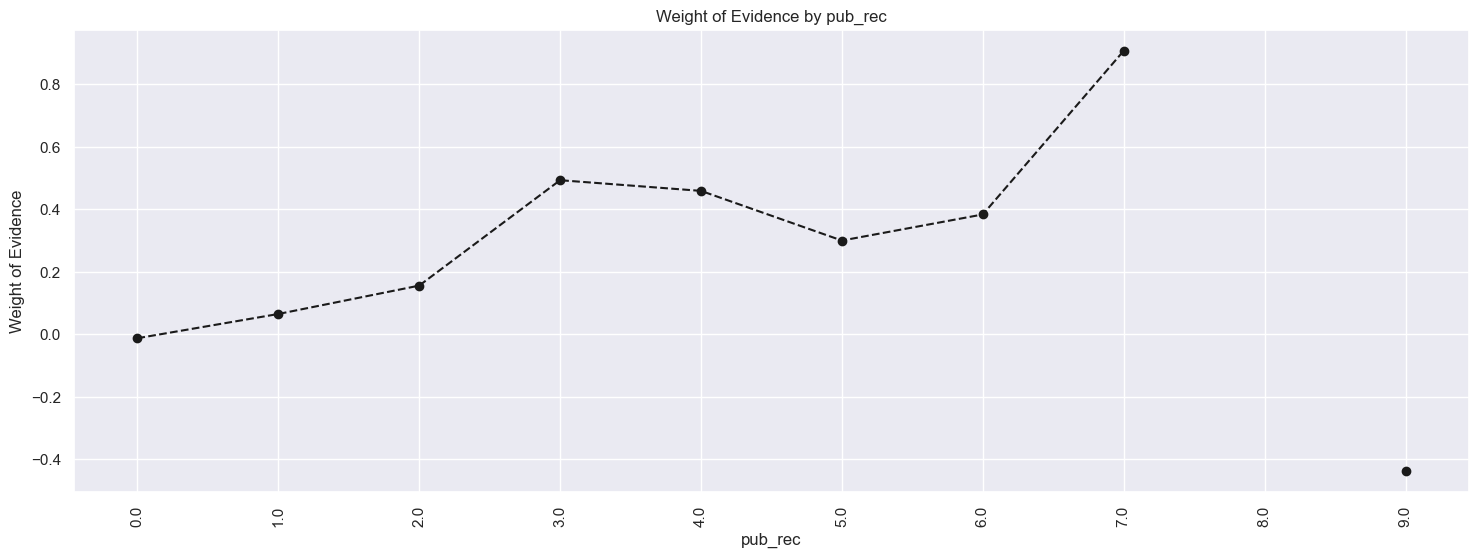

In [123]:
plot_by_woe(df_temp, 90)

In [124]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [125]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-0.15, 3.0]    459   0.819172    0.001230    376.0    83.0   
1        (3.0, 6.0]   6004   0.871419    0.016095   5232.0   772.0   
2        (6.0, 9.0]  15047   0.884096    0.040337  13303.0  1744.0   
3       (9.0, 12.0]  25169   0.893043    0.067472  22477.0  2692.0   
4      (12.0, 15.0]  33651   0.894386    0.090210  30097.0  3554.0   
5      (15.0, 18.0]  38711   0.900183    0.103775  34847.0  3864.0   
6      (18.0, 21.0]  40599   0.898470    0.108836  36477.0  4122.0   
7      (21.0, 24.0]  40163   0.903717    0.107668  36296.0  3867.0   
8      (24.0, 27.0]  36286   0.907788    0.097274  32940.0  3346.0   
9      (27.0, 30.0]  31775   0.909898    0.085181  28912.0  2863.0   
10     (30.0, 33.0]  25900   0.907683    0.069432  23509.0  2391.0   
11     (33.0, 36.0]  20748   0.910064    0.055620  18882.0  1866.0   
12     (36.0, 39.0]  16055   0.912924    0.043040  14657.0  1398.0   
13     (39.0, 42.0]  12134   0.914620    0.032528  11098.0  1036.0   
14     (42.0, 45.0]   9107   0.908752    0.024414   8276.0   831.0   
15     (45.0, 48.0]   6494   0.906837    0.017409   5889.0   605.0   
16     (48.0, 51.0]   4551   0.914964    0.012200   4164.0   387.0   
17     (51.0, 54.0]   3260   0.922393    0.008739   3007.0   253.0   
18     (54.0, 57.0]   2146   0.916123    0.005753   1966.0   180.0   
19     (57.0, 60.0]   1605   0.906542    0.004303   1455.0   150.0   
20     (60.0, 63.0]   2164   0.911738    0.005801   1973.0   191.0   
21     (63.0, 66.0]    317   0.927445    0.000850    294.0    23.0   
22     (66.0, 69.0]    218   0.944954    0.000584    206.0    12.0   
23     (69.0, 72.0]    120   0.950000    0.000322    114.0     6.0   
24     (72.0, 75.0]    114   0.938596    0.000306    107.0     7.0   
25     (75.0, 78.0]     64   0.906250    0.000172     58.0     6.0   
26     (78.0, 81.0]     52   0.942308    0.000139     49.0     3.0   
27     (81.0, 84.0]     25   0.920000    0.000067     23.0     2.0   
28     (84.0, 87.0]     28   0.964286    0.000075     27.0     1.0   
29     (87.0, 90.0]     22   0.909091    0.000059     20.0     2.0   
30     (90.0, 93.0]     12   0.916667    0.000032     11.0     1.0   
31     (93.0, 96.0]      8   0.875000    0.000021      7.0     1.0   
32     (96.0, 99.0]      4   1.000000    0.000011      4.0     0.0   
33    (99.0, 102.0]      4   1.000000    0.000011      4.0     0.0   
34   (102.0, 105.0]      4   1.000000    0.000011      4.0     0.0   
35   (105.0, 108.0]      1   1.000000    0.000003      1.0     0.0   
36   (108.0, 111.0]      0        NaN    0.000000      NaN     NaN   
37   (111.0, 114.0]      0        NaN    0.000000      NaN     NaN   
38   (114.0, 117.0]      2   1.000000    0.000005      2.0     0.0   
39   (117.0, 120.0]      2   1.000000    0.000005      2.0     0.0   
40   (120.0, 123.0]      1   1.000000    0.000003      1.0     0.0   
41   (123.0, 126.0]      1   1.000000    0.000003      1.0     0.0   
42   (126.0, 129.0]      0        NaN    0.000000      NaN     NaN   
43   (129.0, 132.0]      0        NaN    0.000000      NaN     NaN   
44   (132.0, 135.0]      0        NaN    0.000000      NaN     NaN   
45   (135.0, 138.0]      0        NaN    0.000000      NaN     NaN   
46   (138.0, 141.0]      0        NaN    0.000000      NaN     NaN   
47   (141.0, 144.0]      0        NaN    0.000000      NaN     NaN   
48   (144.0, 147.0]      0        NaN    0.000000      NaN     NaN   
49   (147.0, 150.0]      1   1.000000    0.000003      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001116    0.002289 -0.717961             NaN       NaN  inf  
1      0.015536    0.021291 -0.315145        0.052247  0.402816  inf  
2      0.039502    0.048098 -0.196901        0.012677  0.118244  inf  
3      0.066743    0.074244 -0.106501        0.008947  0.090400  inf  
4      0.089370    0.098017 -0.092358        0.001343  0.014144  inf  
5     

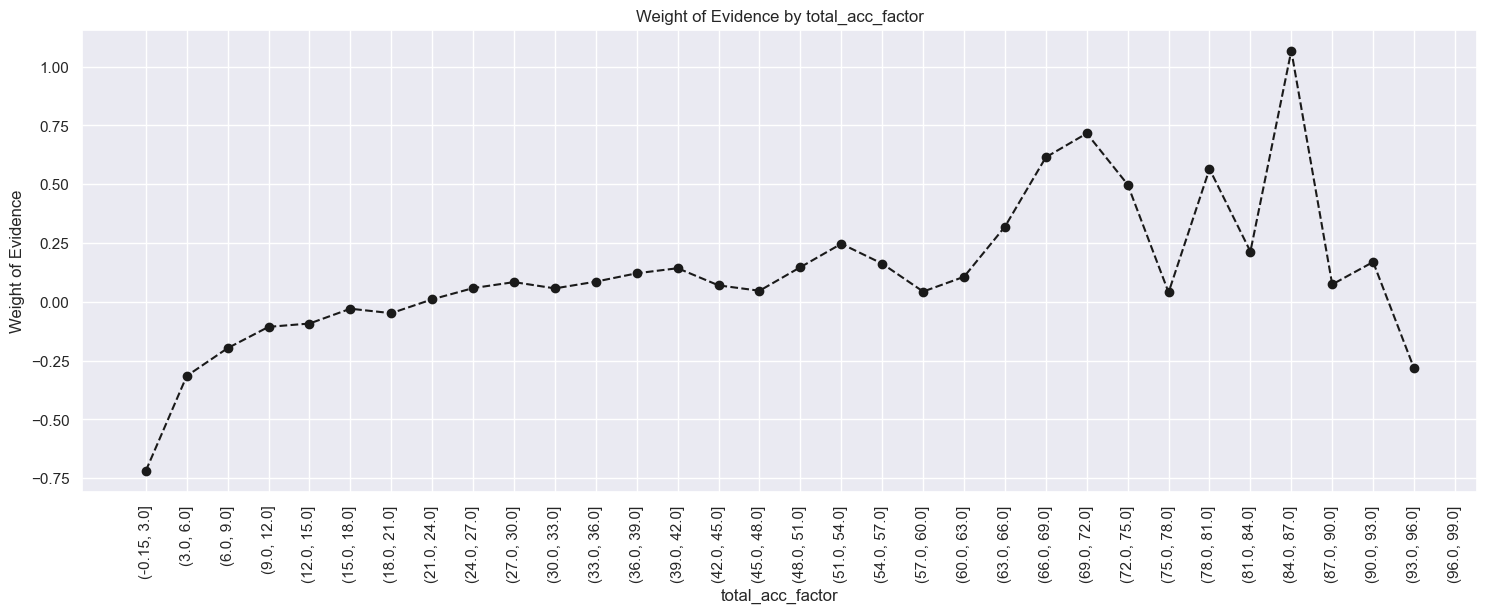

In [126]:
plot_by_woe(df_temp, 90)

In [127]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [128]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  371682   0.902761    0.996392  335540.0  36142.0   
1             1.0    1263   0.912114    0.003386    1152.0    111.0   
2             2.0      70   0.942857    0.000188      66.0      4.0   
3             3.0       7   0.857143    0.000019       6.0      1.0   
4             4.0       4   1.000000    0.000011       4.0      0.0   
5             5.0       2   0.500000    0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996351    0.996773 -0.000424             NaN       NaN  inf  
1     0.003421    0.003061  0.111015        0.009353  0.111439  inf  
2     0.000196    0.000110  0.574651        0.030743  0.463636  inf  
3     0.000018    0.000028 -0.436950        0.085714  1.011601  inf  
4     0.000012    0.000000       inf        0.142857       inf  inf  
5     0.000003    0.000028 -2.228710        0.500000       inf  inf

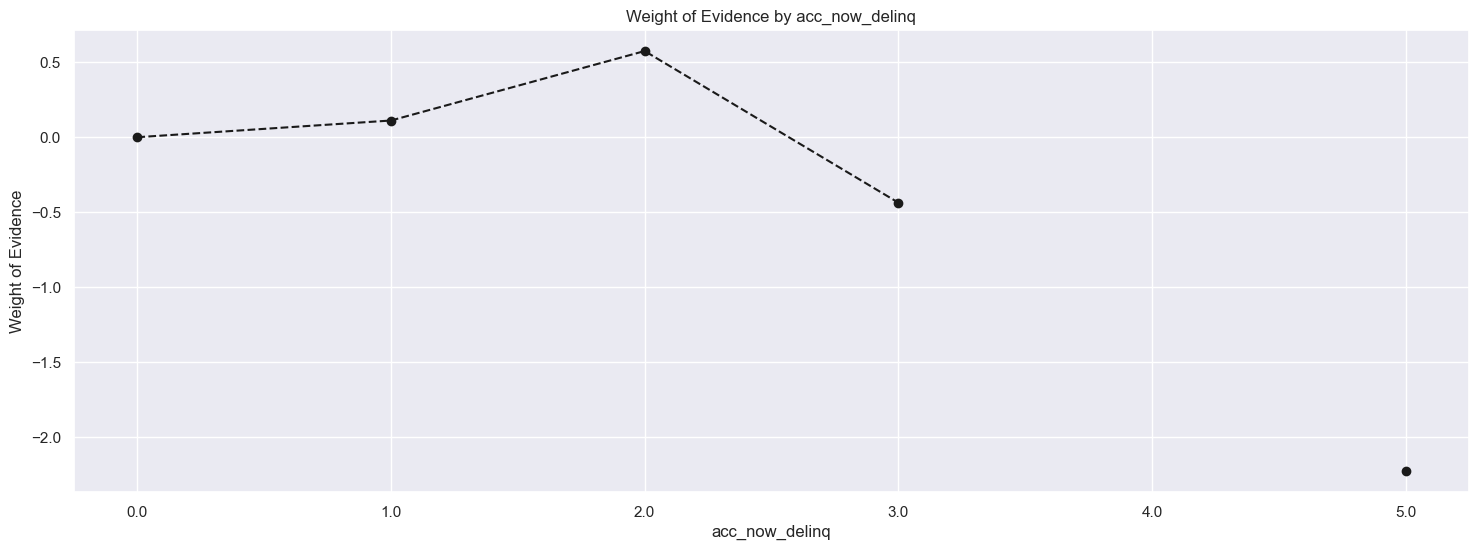

In [129]:
plot_by_woe(df_temp)

In [130]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [131]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

/Users/mang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  19417   0.875212    0.052052  16994.0   
1             (5000.0, 9999.999]  52655   0.888007    0.141156  46758.0   
2          (9999.999, 14999.998]  59570   0.892127    0.159693  53144.0   
3         (14999.998, 19999.998]  51455   0.891128    0.137939  45853.0   
4         (19999.998, 24999.997]  41582   0.899091    0.111472  37386.0   
...                          ...    ...        ...         ...      ...   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000      NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000      NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000      NaN   
1998    (9989999.001, 9994999.0]      0        NaN    0.000000      NaN   
1999      (9994999.0, 9999999.0]      2   1.000000    0.000005      2.0   

       n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     2423.0     0.050462    0.066825 -0.280856             NaN       NaN  inf  
1     5897.0     0.138843    0.162635 -0.158168        0.012794  0.122688  inf  
2     6426.0     0.157805    0.177225 -0.116057        0.004120  0.042111  inf  
3     5602.0     0.136156    0.154500 -0.126393        0.000999  0.010336  inf  
4     4196.0     0.111014    0.115723 -0.041545        0.007963  0.084848  inf  
...      ...          ...         ...       ...             ...       ...  ...  
1995     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1996     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1997     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1998     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.0     0.000006    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

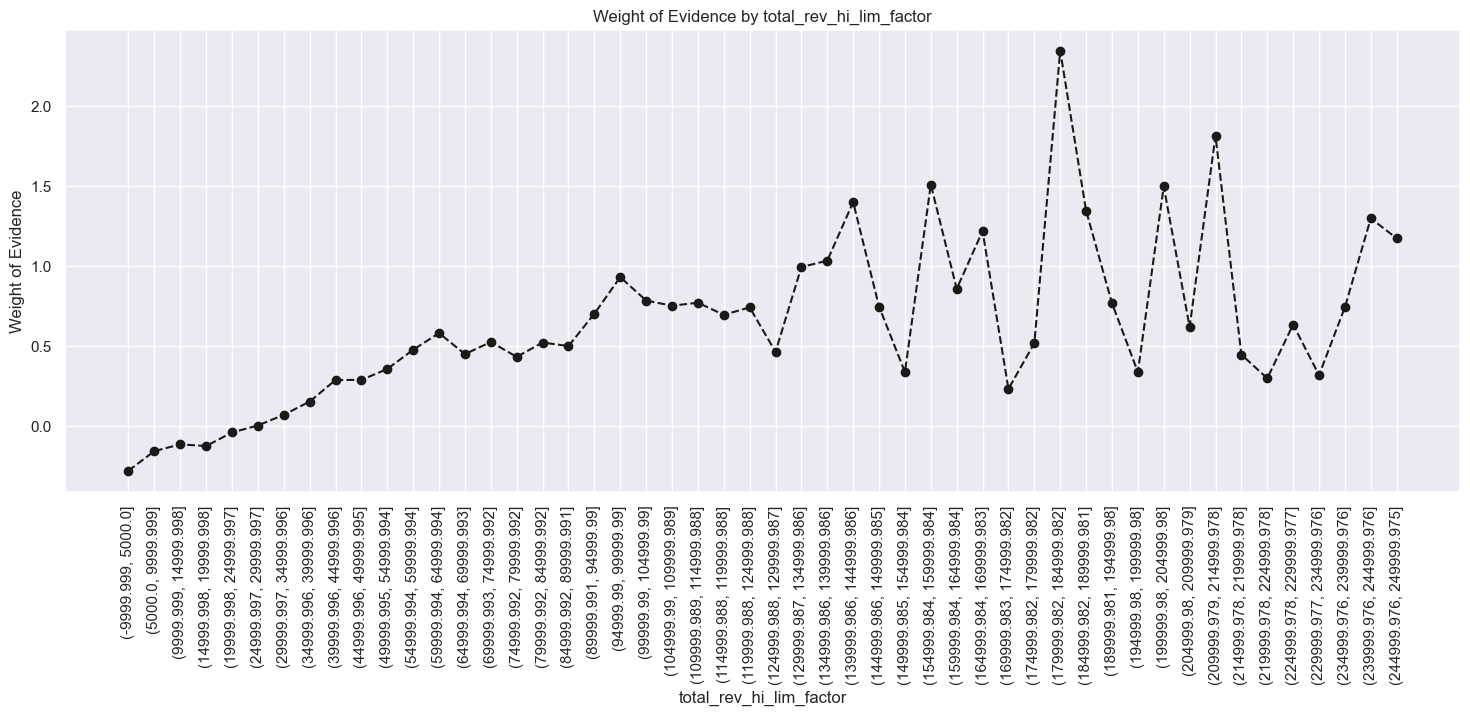

In [132]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [133]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [134]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (14.276, 43.556]   1812   0.911700    0.004858   1652.0   160.0   
1       (43.556, 71.443]   4841   0.902913    0.012978   4371.0   470.0   
2       (71.443, 99.329]   6824   0.898007    0.018294   6128.0   696.0   
3      (99.329, 127.216]   9138   0.895820    0.024497   8186.0   952.0   
4     (127.216, 155.102]  10040   0.902789    0.026915   9064.0   976.0   
5     (155.102, 182.988]  16816   0.904912    0.045080  15217.0  1599.0   
6     (182.988, 210.875]  17216   0.912465    0.046152  15709.0  1507.0   
7     (210.875, 238.761]  15090   0.910338    0.040453  13737.0  1353.0   
8     (238.761, 266.648]  18842   0.913650    0.050511  17215.0  1627.0   
9     (266.648, 294.534]  20100   0.905075    0.053883  18192.0  1908.0   
10     (294.534, 322.42]  20364   0.910430    0.054591  18540.0  1824.0   
11     (322.42, 350.307]  25521   0.903256    0.068416  23052.0  2469.0   
12    (350.307, 378.193]  19006   0.898874    0.050951  17084.0  1922.0   
13     (378.193, 406.08]  18079   0.906355    0.048466  16386.0  1693.0   
14     (406.08, 433.966]  13345   0.891120    0.035775  11892.0  1453.0   
15    (433.966, 461.852]  12574   0.897487    0.033708  11285.0  1289.0   
16    (461.852, 489.739]  15685   0.905834    0.042048  14208.0  1477.0   
17    (489.739, 517.625]  15648   0.903438    0.041949  14137.0  1511.0   
18    (517.625, 545.512]  10775   0.881299    0.028885   9496.0  1279.0   
19    (545.512, 573.398]  10558   0.890699    0.028304   9404.0  1154.0   
20    (573.398, 601.284]   9464   0.891801    0.025371   8440.0  1024.0   
21    (601.284, 629.171]   9341   0.914463    0.025041   8542.0   799.0   
22    (629.171, 657.057]   8357   0.908939    0.022403   7596.0   761.0   
23    (657.057, 684.944]   9171   0.905899    0.024585   8308.0   863.0   
24     (684.944, 712.83]   6171   0.894831    0.016543   5522.0   649.0   
25     (712.83, 740.716]   4841   0.897335    0.012978   4344.0   497.0   
26    (740.716, 768.603]   5231   0.908431    0.014023   4752.0   479.0   
27    (768.603, 796.489]   4926   0.917783    0.013205   4521.0   405.0   
28    (796.489, 824.376]   4050   0.901728    0.010857   3652.0   398.0   
29    (824.376, 852.262]   3643   0.901729    0.009766   3285.0   358.0   
30    (852.262, 880.148]   4260   0.903991    0.011420   3851.0   409.0   
31    (880.148, 908.035]   3247   0.890976    0.008704   2893.0   354.0   
32    (908.035, 935.921]   2189   0.892188    0.005868   1953.0   236.0   
33    (935.921, 963.808]   2440   0.888525    0.006541   2168.0   272.0   
34    (963.808, 991.694]   1787   0.849468    0.004791   1518.0   269.0   
35    (991.694, 1019.58]   1617   0.874459    0.004335   1414.0   203.0   
36   (1019.58, 1047.467]   1267   0.887924    0.003397   1125.0   142.0   
37  (1047.467, 1075.353]    898   0.905345    0.002407    813.0    85.0   
38   (1075.353, 1103.24]   1035   0.937198    0.002775    970.0    65.0   
39   (1103.24, 1131.126]    832   0.930288    0.002230    774.0    58.0   
40  (1131.126, 1159.012]    972   0.932099    0.002606    906.0    66.0   
41  (1159.012, 1186.899]   1181   0.927180    0.003166   1095.0    86.0   
42  (1186.899, 1214.785]   1252   0.912939    0.003356   1143.0   109.0   
43  (1214.785, 1242.672]   1019   0.900883    0.002732    918.0   101.0   
44  (1242.672, 1270.558]    711   0.867792    0.001906    617.0    94.0   
45  (1270.558, 1298.444]    457   0.838074    0.001225    383.0    74.0   
46  (1298.444, 1326.331]    197   0.796954    0.000528    157.0    40.0   
47  (1326.331, 1354.217]    121   0.776860    0.000324     94.0    27.0   
48  (1354.217, 1382.104]     41   0.731707    0.000110     30.0    11.0   
49   (1382.104, 1409.99]     36   0.833333    0.000097     30.0     6.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.004905    0.004413  0.105859             NaN       NaN  0.013047  
1      0.012979    0.012962 

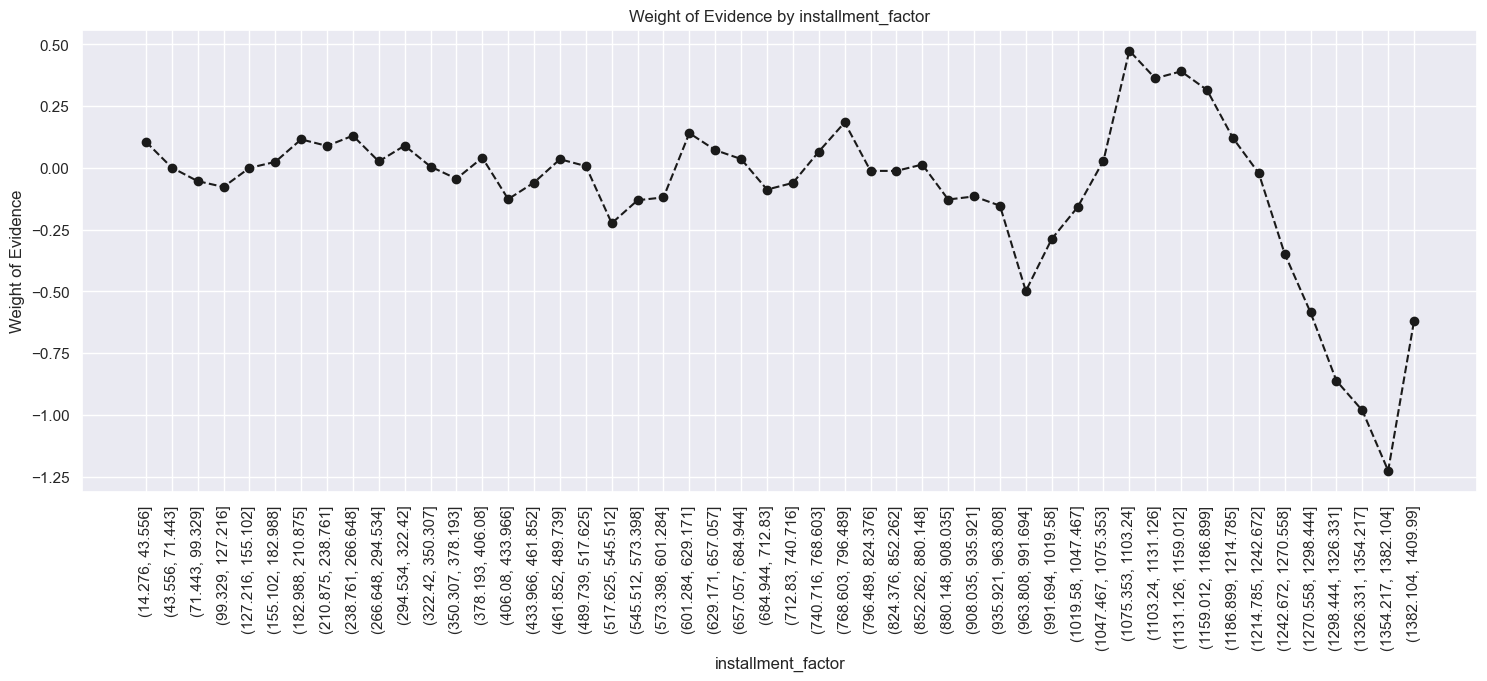

In [135]:
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [136]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0     (-5243.882, 144693.64]  351904   0.900839    0.943372  317009.0   
1     (144693.64, 287491.28]   19004   0.934698    0.050945   17763.0   
2     (287491.28, 430288.92]    1525   0.943607    0.004088    1439.0   
3     (430288.92, 573086.56]     332   0.942771    0.000890     313.0   
4      (573086.56, 715884.2]     112   0.901786    0.000300     101.0   
5      (715884.2, 858681.84]      65   0.907692    0.000174      59.0   
6    (858681.84, 1001479.48]      39   0.974359    0.000105      38.0   
7   (1001479.48, 1144277.12]      10   1.000000    0.000027      10.0   
8   (1144277.12, 1287074.76]      12   1.000000    0.000032      12.0   
9    (1287074.76, 1429872.4]       6   1.000000    0.000016       6.0   
10   (1429872.4, 1572670.04]       3   1.000000    0.000008       3.0   
11  (1572670.04, 1715467.68]       1   1.000000    0.000003       1.0   
12  (1715467.68, 1858265.32]       1   1.000000    0.000003       1.0   
13  (1858265.32, 2001062.96]       6   1.000000    0.000016       6.0   
14   (2001062.96, 2143860.6]       1   1.000000    0.000003       1.0   
15   (2143860.6, 2286658.24]       0        NaN    0.000000       NaN   
16  (2286658.24, 2429455.88]       0        NaN    0.000000       NaN   
17  (2429455.88, 2572253.52]       0        NaN    0.000000       NaN   
18  (2572253.52, 2715051.16]       0        NaN    0.000000       NaN   
19   (2715051.16, 2857848.8]       0        NaN    0.000000       NaN   
20   (2857848.8, 3000646.44]       0        NaN    0.000000       NaN   
21  (3000646.44, 3143444.08]       0        NaN    0.000000       NaN   
22  (3143444.08, 3286241.72]       0        NaN    0.000000       NaN   
23  (3286241.72, 3429039.36]       0        NaN    0.000000       NaN   
24   (3429039.36, 3571837.0]       0        NaN    0.000000       NaN   
25   (3571837.0, 3714634.64]       0        NaN    0.000000       NaN   
26  (3714634.64, 3857432.28]       0        NaN    0.000000       NaN   
27  (3857432.28, 4000229.92]       1   1.000000    0.000003       1.0   
28  (4000229.92, 4143027.56]       0        NaN    0.000000       NaN   
29   (4143027.56, 4285825.2]       0        NaN    0.000000       NaN   
30   (4285825.2, 4428622.84]       0        NaN    0.000000       NaN   
31  (4428622.84, 4571420.48]       1   1.000000    0.000003       1.0   
32  (4571420.48, 4714218.12]       0        NaN    0.000000       NaN   
33  (4714218.12, 4857015.76]       0        NaN    0.000000       NaN   
34   (4857015.76, 4999813.4]       1   1.000000    0.000003       1.0   
35   (4999813.4, 5142611.04]       1   1.000000    0.000003       1.0   
36  (5142611.04, 5285408.68]       0        NaN    0.000000       NaN   
37  (5285408.68, 5428206.32]       0        NaN    0.000000       NaN   
38  (5428206.32, 5571003.96]       0        NaN    0.000000       NaN   
39   (5571003.96, 5713801.6]       0        NaN    0.000000       NaN   
40   (5713801.6, 5856599.24]       0        NaN    0.000000       NaN   
41  (5856599.24, 5999396.88]       0        NaN    0.000000       NaN   
42  (5999396.88, 6142194.52]       2   1.000000    0.000005       2.0   
43  (6142194.52, 6284992.16]       0        NaN    0.000000       NaN   
44   (6284992.16, 6427789.8]       0        NaN    0.000000       NaN   
45   (6427789.8, 6570587.44]       0        NaN    0.000000       NaN   
46  (6570587.44, 6713385.08]       0        NaN    0.000000       NaN   
47  (6713385.08, 6856182.72]       0        NaN    0.000000       NaN   
48  (6856182.72, 6998980.36]       0        NaN    0.000000       NaN   
49   (6998980.36, 7141778.0]       1   1.000000    0.000003       1.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   34895.0     0.941325    0.962382 -0.022123             NaN       NaN  inf  
1    1241.0     0.052745    0.034226  0.432491        0.033859  0.454614  inf  
2      86.0     0.004273    0.002372  0.588647 

In [137]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0      (-5243.882, 73294.82]  231445   0.889114    0.620449  205781.0   
1      (73294.82, 144693.64]  120459   0.923368    0.322922  111228.0   
2     (144693.64, 216092.46]   15885   0.934655    0.042584   14847.0   
3     (216092.46, 287491.28]    3119   0.934915    0.008361    2916.0   
4      (287491.28, 358890.1]    1117   0.940913    0.002994    1051.0   
5      (358890.1, 430288.92]     408   0.950980    0.001094     388.0   
6     (430288.92, 501687.74]     245   0.951020    0.000657     233.0   
7     (501687.74, 573086.56]      87   0.919540    0.000233      80.0   
8     (573086.56, 644485.38]      61   0.901639    0.000164      55.0   
9      (644485.38, 715884.2]      51   0.901961    0.000137      46.0   
10     (715884.2, 787283.02]      37   0.945946    0.000099      35.0   
11    (787283.02, 858681.84]      28   0.857143    0.000075      24.0   
12    (858681.84, 930080.66]      17   1.000000    0.000046      17.0   
13   (930080.66, 1001479.48]      22   0.954545    0.000059      21.0   
14   (1001479.48, 1072878.3]       3   1.000000    0.000008       3.0   
15   (1072878.3, 1144277.12]       7   1.000000    0.000019       7.0   
16  (1144277.12, 1215675.94]       8   1.000000    0.000021       8.0   
17  (1215675.94, 1287074.76]       4   1.000000    0.000011       4.0   
18  (1287074.76, 1358473.58]       4   1.000000    0.000011       4.0   
19   (1358473.58, 1429872.4]       2   1.000000    0.000005       2.0   
20   (1429872.4, 1501271.22]       2   1.000000    0.000005       2.0   
21  (1501271.22, 1572670.04]       1   1.000000    0.000003       1.0   
22  (1572670.04, 1644068.86]       1   1.000000    0.000003       1.0   
23  (1644068.86, 1715467.68]       0        NaN    0.000000       NaN   
24   (1715467.68, 1786866.5]       1   1.000000    0.000003       1.0   
25   (1786866.5, 1858265.32]       0        NaN    0.000000       NaN   
26  (1858265.32, 1929664.14]       1   1.000000    0.000003       1.0   
27  (1929664.14, 2001062.96]       5   1.000000    0.000013       5.0   
28  (2001062.96, 2072461.78]       1   1.000000    0.000003       1.0   
29   (2072461.78, 2143860.6]       0        NaN    0.000000       NaN   
30   (2143860.6, 2215259.42]       0        NaN    0.000000       NaN   
31  (2215259.42, 2286658.24]       0        NaN    0.000000       NaN   
32  (2286658.24, 2358057.06]       0        NaN    0.000000       NaN   
33  (2358057.06, 2429455.88]       0        NaN    0.000000       NaN   
34   (2429455.88, 2500854.7]       0        NaN    0.000000       NaN   
35   (2500854.7, 2572253.52]       0        NaN    0.000000       NaN   
36  (2572253.52, 2643652.34]       0        NaN    0.000000       NaN   
37  (2643652.34, 2715051.16]       0        NaN    0.000000       NaN   
38  (2715051.16, 2786449.98]       0        NaN    0.000000       NaN   
39   (2786449.98, 2857848.8]       0        NaN    0.000000       NaN   
40   (2857848.8, 2929247.62]       0        NaN    0.000000       NaN   
41  (2929247.62, 3000646.44]       0        NaN    0.000000       NaN   
42  (3000646.44, 3072045.26]       0        NaN    0.000000       NaN   
43  (3072045.26, 3143444.08]       0        NaN    0.000000       NaN   
44   (3143444.08, 3214842.9]       0        NaN    0.000000       NaN   
45   (3214842.9, 3286241.72]       0        NaN    0.000000       NaN   
46  (3286241.72, 3357640.54]       0        NaN    0.000000       NaN   
47  (3357640.54, 3429039.36]       0        NaN    0.000000       NaN   
48  (3429039.36, 3500438.18]       0        NaN    0.000000       NaN   
49   (3500438.18, 3571837.0]       0        NaN    0.000000       NaN   
50   (3571837.0, 3643235.82]       0        NaN    0.000000       NaN   
51  (3643235.82, 3714634.64]       0        NaN    0.000000       NaN   
52  (3714634.64, 3786033.46]       0        NaN    0.000000       NaN   
53  (3786033.46, 3857432.28]       0        NaN    0.000000       NaN

In [138]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [139]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_2621/2617213279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (1757.896, 4658.08]     15   0.800000    0.000043     12.0     3.0   
1       (4658.08, 7420.16]     40   0.750000    0.000114     30.0    10.0   
2      (7420.16, 10182.24]    287   0.888502    0.000818    255.0    32.0   
3     (10182.24, 12944.32]    547   0.831810    0.001558    455.0    92.0   
4      (12944.32, 15706.4]   1210   0.839669    0.003447   1016.0   194.0   
5      (15706.4, 18468.48]   1522   0.864652    0.004335   1316.0   206.0   
6     (18468.48, 21230.56]   2928   0.868169    0.008340   2542.0   386.0   
7     (21230.56, 23992.64]   2495   0.859319    0.007107   2144.0   351.0   
8     (23992.64, 26754.72]   7016   0.864595    0.019985   6066.0   950.0   
9      (26754.72, 29516.8]   5643   0.875775    0.016074   4942.0   701.0   
10     (29516.8, 32278.88]  11915   0.872933    0.033940  10401.0  1514.0   
11    (32278.88, 35040.96]  12241   0.876236    0.034868  10726.0  1515.0   
12    (35040.96, 37803.04]   7905   0.873624    0.022517   6906.0   999.0   
13    (37803.04, 40565.12]  17910   0.879676    0.051017  15755.0  2155.0   
14     (40565.12, 43327.2]  12508   0.883115    0.035629  11046.0  1462.0   
15     (43327.2, 46089.28]  16590   0.886679    0.047257  14710.0  1880.0   
16    (46089.28, 48851.36]   9878   0.889046    0.028137   8782.0  1096.0   
17    (48851.36, 51613.44]  19024   0.891505    0.054190  16960.0  2064.0   
18    (51613.44, 54375.52]  12766   0.899734    0.036364  11486.0  1280.0   
19     (54375.52, 57137.6]  16153   0.900266    0.046012  14542.0  1611.0   
20     (57137.6, 59899.68]   6482   0.900494    0.018464   5837.0   645.0   
21    (59899.68, 62661.76]  21299   0.894080    0.060670  19043.0  2256.0   
22    (62661.76, 65423.84]  16090   0.902300    0.045832  14518.0  1572.0   
23    (65423.84, 68185.92]   7942   0.908335    0.022623   7214.0   728.0   
24     (68185.92, 70948.0]  12982   0.905639    0.036979  11757.0  1225.0   
25     (70948.0, 73710.08]   8385   0.908050    0.023885   7614.0   771.0   
26    (73710.08, 76472.16]  13145   0.912895    0.037444  12000.0  1145.0   
27    (76472.16, 79234.24]   5679   0.914598    0.016177   5194.0   485.0   
28    (79234.24, 81996.32]  11397   0.914539    0.032464  10423.0   974.0   
29     (81996.32, 84758.4]   6063   0.924295    0.017270   5604.0   459.0   
30     (84758.4, 87520.48]   9980   0.918236    0.028428   9164.0   816.0   
31    (87520.48, 90282.56]  10393   0.918310    0.029604   9544.0   849.0   
32    (90282.56, 93044.64]   4337   0.926447    0.012354   4018.0   319.0   
33    (93044.64, 95806.72]   5634   0.922080    0.016048   5195.0   439.0   
34     (95806.72, 98568.8]   4667   0.919649    0.013294   4292.0   375.0   
35    (98568.8, 101330.88]   8793   0.925509    0.025047   8138.0   655.0   
36  (101330.88, 104092.96]   3232   0.932240    0.009206   3013.0   219.0   
37  (104092.96, 106855.04]   3736   0.934422    0.010642   3491.0   245.0   
38  (106855.04, 109617.12]   2277   0.933245    0.006486   2125.0   152.0   
39   (109617.12, 112379.2]   5714   0.925971    0.016276   5291.0   423.0   
40   (112379.2, 115141.28]   3218   0.947483    0.009166   3049.0   169.0   
41  (115141.28, 117903.36]   1128   0.931738    0.003213   1051.0    77.0   
42  (117903.36, 120665.44]   6228   0.924374    0.017740   5757.0   471.0   
43  (120665.44, 123427.52]   1043   0.946309    0.002971    987.0    56.0   
44   (123427.52, 126189.6]   3566   0.931576    0.010158   3322.0   244.0   
45   (126189.6, 128951.68]    791   0.927939    0.002253    734.0    57.0   
46  (128951.68, 131713.76]   3033   0.939993    0.008639   2851.0   182.0   
47  (131713.76, 134475.84]    801   0.925094    0.002282    741.0    60.0   
48  (134475.84, 137237.92]   1902   0.949527    0.005418   1806.0    96.0   
49   (137237.92, 140000.0]   2532   0.934439    0.007212   2366.0   166.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    

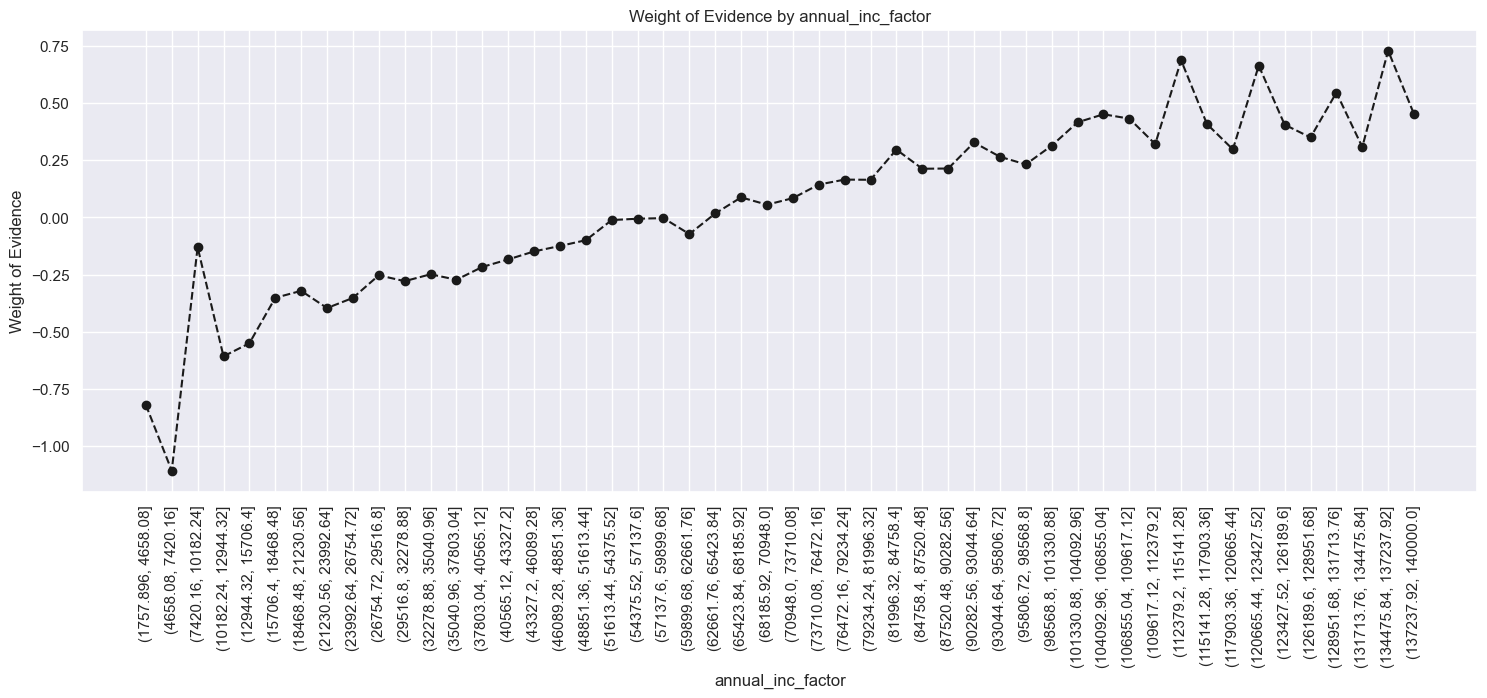

In [140]:
plot_by_woe(df_temp, 90)

In [141]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [142]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_2621/731008171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   5277   0.884025    0.030531   4665.0   
1                   (3.76, 7.52]  11167   0.902928    0.064608  10083.0   
2                  (7.52, 11.28]  13306   0.908237    0.076983  12085.0   
3                 (11.28, 15.04]  13216   0.903223    0.076462  11937.0   
4                  (15.04, 18.8]   9337   0.907786    0.054020   8476.0   
5                  (18.8, 22.56]  11641   0.906623    0.067350  10554.0   
6                 (22.56, 26.32]  10887   0.908698    0.062988   9893.0   
7                 (26.32, 30.08]  10560   0.907197    0.061096   9580.0   
8                 (30.08, 33.84]   7576   0.914203    0.043832   6926.0   
9                  (33.84, 37.6]   9795   0.910873    0.056670   8922.0   
10                 (37.6, 41.36]   9352   0.903764    0.054107   8452.0   
11                (41.36, 45.12]   9202   0.908172    0.053239   8357.0   
12                (45.12, 48.88]   6538   0.911135    0.037826   5957.0   
13                (48.88, 52.64]   6486   0.903793    0.037525   5862.0   
14                 (52.64, 56.4]   6045   0.906865    0.034974   5482.0   
15                 (56.4, 60.16]   5867   0.912903    0.033944   5356.0   
16                (60.16, 63.92]   4040   0.898020    0.023374   3628.0   
17                (63.92, 67.68]   5314   0.904968    0.030745   4809.0   
18                (67.68, 71.44]   5141   0.904104    0.029744   4648.0   
19                 (71.44, 75.2]   4950   0.899798    0.028639   4454.0   
20                 (75.2, 78.96]   3312   0.908213    0.019162   3008.0   
21                (78.96, 82.72]   3577   0.901034    0.020695   3223.0   
22                (82.72, 86.48]     94   0.829787    0.000544     78.0   
23                (86.48, 90.24]     38   0.894737    0.000220     34.0   
24                 (90.24, 94.0]     32   0.937500    0.000185     30.0   
25                 (94.0, 97.76]     20   0.750000    0.000116     15.0   
26               (97.76, 101.52]     13   0.923077    0.000075     12.0   
27              (101.52, 105.28]     11   0.909091    0.000064     10.0   
28              (105.28, 109.04]      8   0.750000    0.000046      6.0   
29               (109.04, 112.8]      2   0.500000    0.000012      1.0   
30               (112.8, 116.56]      7   0.857143    0.000040      6.0   
31              (116.56, 120.32]      2   1.000000    0.000012      2.0   
32              (120.32, 124.08]      1   1.000000    0.000006      1.0   
33              (124.08, 127.84]      2   1.000000    0.000012      2.0   
34               (127.84, 131.6]      5   1.000000    0.000029      5.0   
35               (131.6, 135.36]      7   0.857143    0.000040      6.0   
36              (135.36, 139.12]      2   1.000000    0.000012      2.0   
37              (139.12, 142.88]      3   1.000000    0.000017      3.0   
38              (142.88, 146.64]      1   1.000000    0.000006      1.0   
39               (146.64, 150.4]      3   0.666667    0.000017      2.0   
40               (150.4, 154.16]      2   0.500000    0.000012      1.0   
41              (154.16, 157.92]      1   1.000000    0.000006      1.0   
42              (157.92, 161.68]      1   1.000000    0.000006      1.0   
43              (161.68, 165.44]      0        NaN    0.000000      NaN   
44               (165.44, 169.2]      0        NaN    0.000000      NaN   
45               (169.2, 172.96]      0        NaN    0.000000      NaN   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000006      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    612.0     0.029793    0.037627 -0.233428             NaN       NaN  inf  
1   1084.0     0.06

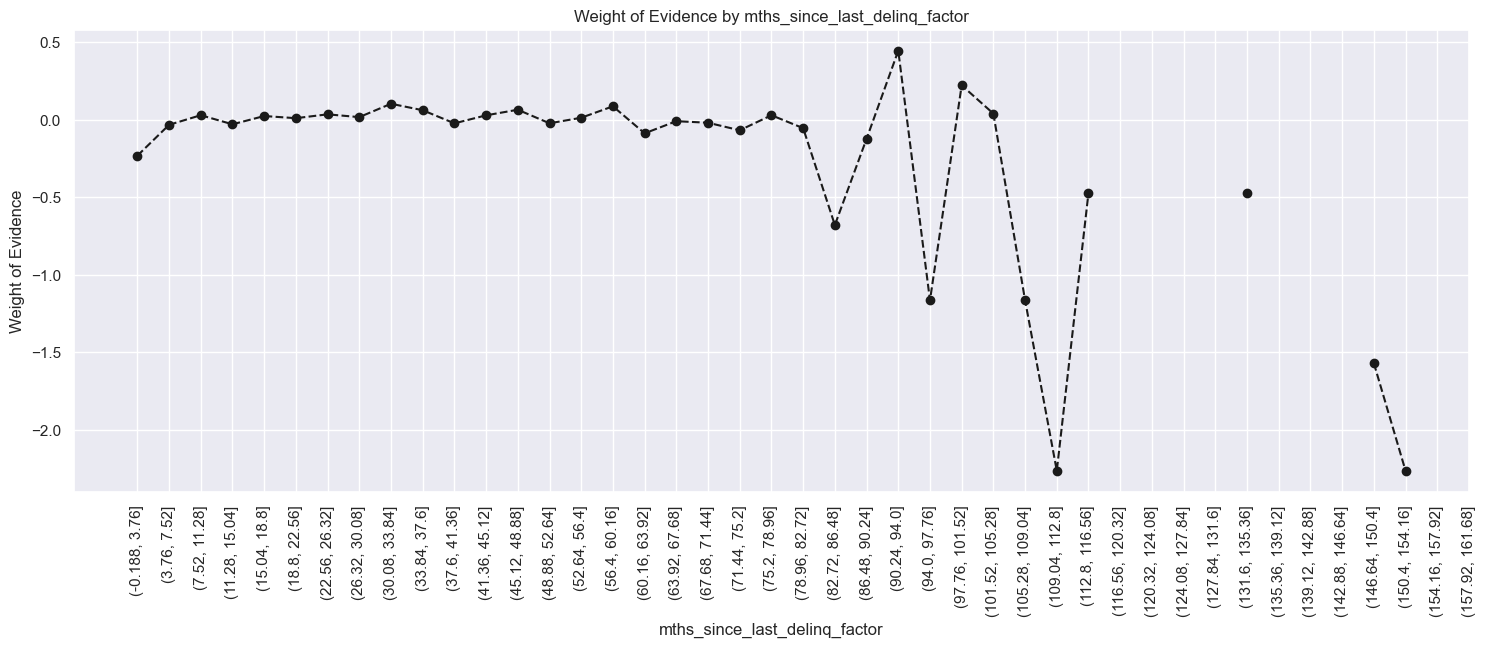

In [143]:
plot_by_woe(df_temp, 90)

In [144]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [145]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    745   0.877852    0.001997   654.0   91.0   
1         (0.4, 0.8]    808   0.924505    0.002166   747.0   61.0   
2         (0.8, 1.2]    922   0.902386    0.002472   832.0   90.0   
3         (1.2, 1.6]   1043   0.901246    0.002796   940.0  103.0   
4         (1.6, 2.0]   1172   0.905290    0.003142  1061.0  111.0   
5       (2.0, 2.399]   1337   0.923710    0.003584  1235.0  102.0   
6     (2.399, 2.799]   1538   0.921326    0.004123  1417.0  121.0   
7     (2.799, 3.199]   1696   0.913915    0.004547  1550.0  146.0   
8     (3.199, 3.599]   1927   0.909704    0.005166  1753.0  174.0   
9     (3.599, 3.999]   2197   0.923532    0.005890  2029.0  168.0   
10    (3.999, 4.399]   2466   0.923358    0.006611  2277.0  189.0   
11    (4.399, 4.799]   2571   0.923376    0.006892  2374.0  197.0   
12    (4.799, 5.199]   2906   0.917068    0.007790  2665.0  241.0   
13    (5.199, 5.599]   3083   0.917613    0.008265  2829.0  254.0   
14    (5.599, 5.999]   3252   0.929889    0.008718  3024.0  228.0   
15    (5.999, 6.398]   3529   0.920091    0.009460  3247.0  282.0   
16    (6.398, 6.798]   3766   0.919278    0.010096  3462.0  304.0   
17    (6.798, 7.198]   3899   0.921262    0.010452  3592.0  307.0   
18    (7.198, 7.598]   4239   0.924039    0.011364  3917.0  322.0   
19    (7.598, 7.998]   4508   0.922138    0.012085  4157.0  351.0   
20    (7.998, 8.398]   4677   0.923455    0.012538  4319.0  358.0   
21    (8.398, 8.798]   4895   0.920327    0.013122  4505.0  390.0   
22    (8.798, 9.198]   5129   0.918893    0.013750  4713.0  416.0   
23    (9.198, 9.598]   5191   0.915431    0.013916  4752.0  439.0   
24    (9.598, 9.998]   5471   0.918479    0.014666  5025.0  446.0   
25   (9.998, 10.397]   5621   0.917275    0.015069  5156.0  465.0   
26  (10.397, 10.797]   5824   0.916724    0.015613  5339.0  485.0   
27  (10.797, 11.197]   6116   0.906475    0.016396  5544.0  572.0   
28  (11.197, 11.597]   6168   0.921044    0.016535  5681.0  487.0   
29  (11.597, 11.997]   6303   0.914327    0.016897  5763.0  540.0   
30  (11.997, 12.397]   6457   0.916989    0.017310  5921.0  536.0   
31  (12.397, 12.797]   6789   0.907645    0.018200  6162.0  627.0   
32  (12.797, 13.197]   6667   0.915554    0.017873  6104.0  563.0   
33  (13.197, 13.597]   6769   0.910474    0.018146  6163.0  606.0   
34  (13.597, 13.997]   6854   0.908812    0.018374  6229.0  625.0   
35  (13.997, 14.396]   6855   0.911889    0.018377  6251.0  604.0   
36  (14.396, 14.796]   7081   0.913289    0.018982  6467.0  614.0   
37  (14.796, 15.196]   6964   0.911258    0.018669  6346.0  618.0   
38  (15.196, 15.596]   6811   0.912201    0.018259  6213.0  598.0   
39  (15.596, 15.996]   7059   0.904802    0.018924  6387.0  672.0   
40  (15.996, 16.396]   6862   0.905130    0.018395  6211.0  651.0   
41  (16.396, 16.796]   6873   0.901790    0.018425  6198.0  675.0   
42  (16.796, 17.196]   6958   0.898678    0.018653  6253.0  705.0   
43  (17.196, 17.596]   6752   0.902992    0.018101  6097.0  655.0   
44  (17.596, 17.996]   6774   0.901978    0.018159  6110.0  664.0   
45  (17.996, 18.395]   6832   0.893735    0.018315  6106.0  726.0   
46  (18.395, 18.795]   6737   0.903369    0.018060  6086.0  651.0   
47  (18.795, 19.195]   6472   0.894932    0.017350  5792.0  680.0   
48  (19.195, 19.595]   6613   0.895055    0.017728  5919.0  694.0   
49  (19.595, 19.995]   6570   0.897108    0.017613  5894.0  676.0   
50  (19.995, 20.395]   6236   0.897530    0.016717  5597.0  639.0   
51  (20.395, 20.795]   6199   0.893370    0.016618  5538.0  661.0   
52  (20.795, 21.195]   5981   0.885638    0.016034  5297.0  684.0   
53  (21.195, 21.595]   5921   0.896639    0.015873  5309.0  612.0   
54  (21.595, 21.995]   5793   0.890903    0.015530  5161.0  632.0   
55  (21.995, 22.394]   5510   0.887114    0.014771  4888.0  622.0   
56  (22.394, 22.794]   5476   0.891527    0.014680  4882.0  594.0   
57  (22.

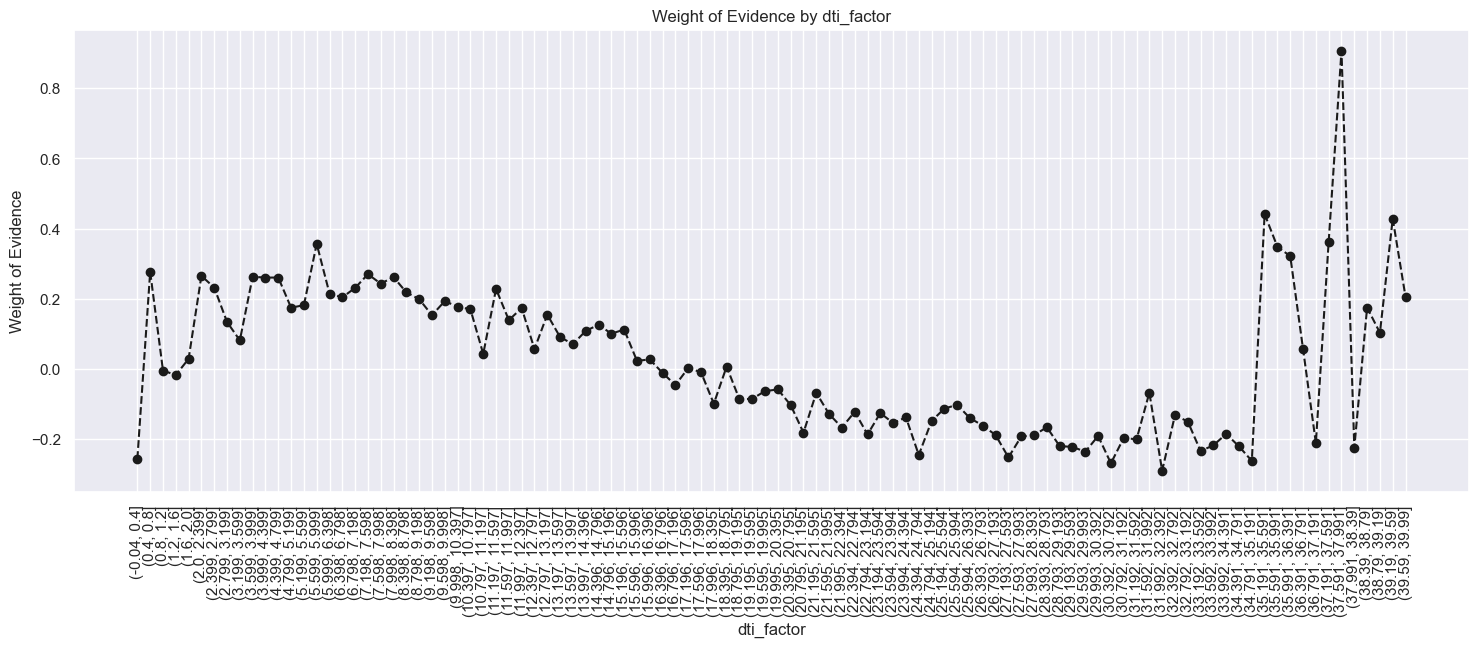

In [146]:
plot_by_woe(df_temp, 90)

In [147]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [148]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_2621/1775951206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


dti_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0   (-0.035, 0.7]   1366   0.898243    0.003690   1227.0   139.0     0.003672   
1      (0.7, 1.4]   1664   0.898438    0.004496   1495.0   169.0     0.004474   
2      (1.4, 2.1]   1986   0.915911    0.005365   1819.0   167.0     0.005444   
3      (2.1, 2.8]   2594   0.919044    0.007008   2384.0   210.0     0.007135   
4      (2.8, 3.5]   3135   0.912281    0.008470   2860.0   275.0     0.008560   
5      (3.5, 4.2]   3844   0.924037    0.010385   3552.0   292.0     0.010631   
6      (4.2, 4.9]   4595   0.920348    0.012414   4229.0   366.0     0.012657   
7      (4.9, 5.6]   5312   0.918110    0.014351   4877.0   435.0     0.014597   
8      (5.6, 6.3]   5927   0.924414    0.016013   5479.0   448.0     0.016398   
9      (6.3, 7.0]   6482   0.918389    0.017512   5953.0   529.0     0.017817   
10     (7.0, 7.7]   7256   0.925441    0.019603   6715.0   541.0     0.020098   
11     (7.7, 8.4]   8120   0.922537    0.021937   7491.0   629.0     0.022420   
12     (8.4, 9.1]   8817   0.919020    0.023820   8103.0   714.0     0.024252   
13     (9.1, 9.8]   9194   0.917229    0.024839   8433.0   761.0     0.025240   
14    (9.8, 10.5]   9888   0.918386    0.026714   9081.0   807.0     0.027179   
15   (10.5, 11.2]  10483   0.909568    0.028321   9535.0   948.0     0.028538   
16   (11.2, 11.9]  10774   0.918693    0.029107   9898.0   876.0     0.029624   
17   (11.9, 12.6]  11566   0.913107    0.031247  10561.0  1005.0     0.031609   
18   (12.6, 13.3]  11670   0.912082    0.031528  10644.0  1026.0     0.031857   
19   (13.3, 14.0]  12043   0.910072    0.032536  10960.0  1083.0     0.032803   
20   (14.0, 14.7]  12212   0.913446    0.032992  11155.0  1057.0     0.033387   
21   (14.7, 15.4]  11941   0.910560    0.032260  10873.0  1068.0     0.032542   
22   (15.4, 16.1]  12117   0.908393    0.032736  11007.0  1110.0     0.032944   
23   (16.1, 16.8]  12054   0.902605    0.032566  10880.0  1174.0     0.032563   
24   (16.8, 17.5]  12222   0.899935    0.033019  10999.0  1223.0     0.032920   
25   (17.5, 18.2]  11921   0.903615    0.032206  10772.0  1149.0     0.032240   
26   (18.2, 18.9]  11753   0.894750    0.031752  10516.0  1237.0     0.031474   
27   (18.9, 19.6]  11242   0.896282    0.030372  10076.0  1166.0     0.030157   
28   (19.6, 20.3]  11286   0.896598    0.030491  10119.0  1167.0     0.030286   
29   (20.3, 21.0]  10987   0.893419    0.029683   9816.0  1171.0     0.029379   
30   (21.0, 21.7]  10285   0.891590    0.027786   9170.0  1115.0     0.027445   
31   (21.7, 22.4]   9797   0.889558    0.026468   8715.0  1082.0     0.026084   
32   (22.4, 23.1]   9475   0.888865    0.025598   8422.0  1053.0     0.025207   
33   (23.1, 23.8]   9229   0.889479    0.024933   8209.0  1020.0     0.024569   
34   (23.8, 24.5]   8858   0.887785    0.023931   7864.0   994.0     0.023537   
35   (24.5, 25.2]   8115   0.883056    0.021924   7166.0   949.0     0.021448   
36   (25.2, 25.9]   6944   0.893145    0.018760   6202.0   742.0     0.018562   
37   (25.9, 26.6]   6676   0.888856    0.018036   5934.0   742.0     0.017760   
38   (26.6, 27.3]   6168   0.887322    0.016664   5473.0   695.0     0.016380   
39   (27.3, 28.0]   5865   0.880818    0.015845   5166.0   699.0     0.015462   
40   (28.0, 28.7]   5588   0.886722    0.015097   4955.0   633.0     0.014830   
41   (28.7, 29.4]   5119   0.882008    0.013830   4515.0   604.0     0.013513   
42   (29.4, 30.1]   4522   0.879478    0.012217   3977.0   545.0     0.011903   
43   (30.1, 30.8]   3451   0.881484    0.009323   3042.0   409.0     0.009105   
44   (30.8, 31.5]   3295   0.883763    0.008902   2912.0   383.0     0.008716   
45   (31.5, 32.2]   2945   0.889643    0.007956   2620.0   325.0     0.007842   
46   (32.2, 32.9]   2617   0.883836    0.007070   2313.0   304.0     0.006923   
47   (32.9, 33.6]   2438   0.885152    0.006587   2158.0   280.0     0.006459   
48   (33.6, 34.3]   2321   0.884102   

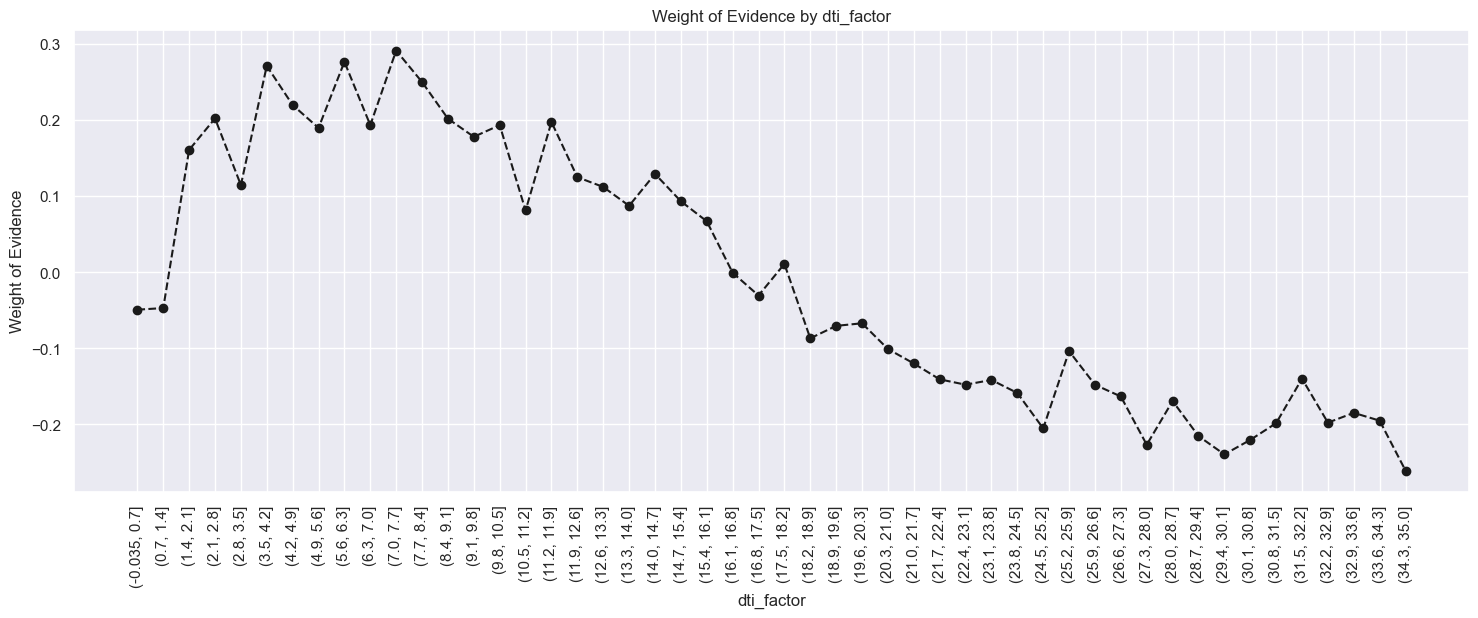

In [149]:
plot_by_woe(df_temp, 90)

In [150]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [151]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_2621/2174144996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.121, 2.42]   1086   0.764273    0.021691   830.0  256.0   
1                   (2.42, 4.84]     76   0.921053    0.001518    70.0    6.0   
2                   (4.84, 7.26]    163   0.938650    0.003256   153.0   10.0   
3                   (7.26, 9.68]    156   0.929487    0.003116   145.0   11.0   
4                   (9.68, 12.1]    292   0.924658    0.005832   270.0   22.0   
5                  (12.1, 14.52]    207   0.932367    0.004134   193.0   14.0   
6                 (14.52, 16.94]    210   0.942857    0.004194   198.0   12.0   
7                 (16.94, 19.36]    334   0.916168    0.006671   306.0   28.0   
8                 (19.36, 21.78]    283   0.932862    0.005652   264.0   19.0   
9                  (21.78, 24.2]    455   0.916484    0.009088   417.0   38.0   
10                 (24.2, 26.62]    339   0.917404    0.006771   311.0   28.0   
11                (26.62, 29.04]    612   0.918301    0.012224   562.0   50.0   
12                (29.04, 31.46]    451   0.920177    0.009008   415.0   36.0   
13                (31.46, 33.88]    487   0.940452    0.009727   458.0   29.0   
14                 (33.88, 36.3]    780   0.932051    0.015579   727.0   53.0   
15                 (36.3, 38.72]    659   0.948407    0.013162   625.0   34.0   
16                (38.72, 41.14]   1008   0.936508    0.020133   944.0   64.0   
17                (41.14, 43.56]    812   0.944581    0.016218   767.0   45.0   
18                (43.56, 45.98]    791   0.939317    0.015799   743.0   48.0   
19                 (45.98, 48.4]   1316   0.938450    0.026285  1235.0   81.0   
20                 (48.4, 50.82]    945   0.933333    0.018875   882.0   63.0   
21                (50.82, 53.24]   1536   0.927083    0.030679  1424.0  112.0   
22                (53.24, 55.66]   1062   0.929379    0.021212   987.0   75.0   
23                (55.66, 58.08]   1662   0.935018    0.033196  1554.0  108.0   
24                 (58.08, 60.5]   1095   0.926941    0.021871  1015.0   80.0   
25                 (60.5, 62.92]   1213   0.919209    0.024228  1115.0   98.0   
26                (62.92, 65.34]   1631   0.924586    0.032576  1508.0  123.0   
27                (65.34, 67.76]   1088   0.932904    0.021731  1015.0   73.0   
28                (67.76, 70.18]   1513   0.925975    0.030220  1401.0  112.0   
29                 (70.18, 72.6]   1041   0.923151    0.020792   961.0   80.0   
30                 (72.6, 75.02]   1420   0.913380    0.028362  1297.0  123.0   
31                (75.02, 77.44]    946   0.911205    0.018895   862.0   84.0   
32                (77.44, 79.86]    939   0.916933    0.018755   861.0   78.0   
33                (79.86, 82.28]   1351   0.905996    0.026984  1224.0  127.0   
34                 (82.28, 84.7]    724   0.912983    0.014461   661.0   63.0   
35                 (84.7, 87.12]   1350   0.868889    0.026964  1173.0  177.0   
36                (87.12, 89.54]    822   0.878345    0.016418   722.0  100.0   
37                (89.54, 91.96]    904   0.875000    0.018056   791.0  113.0   
38                (91.96, 94.38]   1492   0.873995    0.029800  1304.0  188.0   
39                 (94.38, 96.8]   1145   0.861135    0.022869   986.0  159.0   
40                 (96.8, 99.22]   1821   0.896211    0.036371  1632.0  189.0   
41               (99.22, 101.64]   1258   0.880763    0.025126  1108.0  150.0   
42              (101.64, 104.06]   2096   0.896947    0.041864  1880.0  216.0   
43              (104.06, 106.48]   1536   0.893229    0.030679  1372.0  164.0   
44               (106.48, 108.9]   1559   0.905709    0.031138  1412.0  147.0   
45               (108.9, 111.32]   2296   0.899826    0.045859  2066.0  230.0   
46              (111.32, 113.74]   1461   0.900753    0.029181  1316.0  145.0   
47              (113.74, 116.16]   2037   0.880707    0.040685  1794.0  243.0   
48              (116.16, 118.58]  

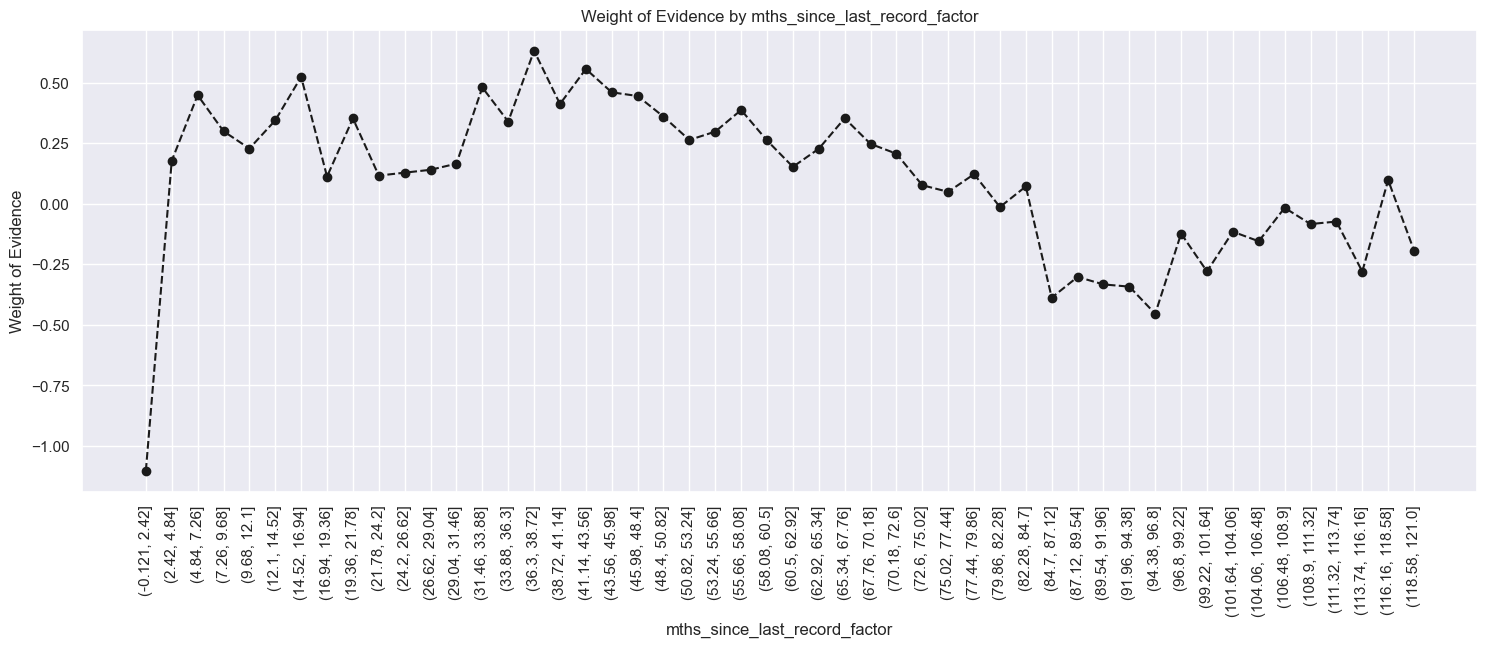

In [152]:
plot_by_woe(df_temp, 90)

In [153]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test Dataset

In [154]:
loan_data_inputs_test = df_inputs_prepr

In [155]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')